# Descriptive Analysis
## Diversity of Emojis

In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import scipy.sparse
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib, mplcairo
import pickle
print('Default backend: ' + matplotlib.get_backend()) 
#matplotlib.use("module://mplcairo.macosx")
#print('Backend is now ' + matplotlib.get_backend())
#sns.set()

path_root = "/Users/atanaltay/Documents/Research/inwork/marketing_emotions/codes/data/all_marketing_data/"
groupsAndCountsPath = path_root + "emoticon_analysis/tr_emoticon_groups_and_counts.csv"
emojisPath = path_root + "emoticon_analysis/emojis.csv"
path_in = path_root+ "tr_emoanalysis.parquet"
path_in_en= path_root + "en_emoanalysis.parquet"
#Existing emojis
groupsAndCountsDfEn = pd.read_csv(path_root + "emoticon_analysis/en_emoticon_groups_and_counts.csv")
groupsAndCountsDfTr = pd.read_csv(groupsAndCountsPath)
#Emoji codes
emojisdf = pd.read_csv(emojisPath)

Default backend: module://matplotlib_inline.backend_inline


In [31]:
cscPathTr = path_root + "emoticon_analysis/count_matrices/tr/csc_count.npz"
featuresPathTr = path_root + "emoticon_analysis/count_matrices/tr/feature_names.npy"

cscPathEn = path_root + "emoticon_analysis/count_matrices/en/csc_count.npz"
featuresPathEn = path_root + "emoticon_analysis/count_matrices/en/feature_names.npy"

cscCountsMatrixTr = scipy.sparse.load_npz(cscPathTr)
featureNamesArrayTr = np.load(featuresPathTr,allow_pickle=True)

cscCountsMatrixEn = scipy.sparse.load_npz(cscPathEn)
featureNamesArrayEn = np.load(featuresPathEn,allow_pickle=True)

dfTr = pd.read_parquet(path_in,columns=["id","created_at","company","type","industry","gender"])
dfEn = pd.read_parquet(path_in_en,columns=["id","created_at","company","type","industry","gender"])

In [57]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [58]:
groupsAndCountsDfTr.head()

,emoticon,cnt,emoji,name,group,sub_group
0,_slightly_smiling_face_,17906,🙂,slightly smiling face,Smileys & Emotion,face-smiling
1,_blue_heart_,17477,💙,blue heart,Smileys & Emotion,emotion
2,_smiling_face_with_smiling_eyes_,12417,😊,smiling face with smiling eyes,Smileys & Emotion,face-smiling
3,_red_heart_,12140,❤️,red heart,Smileys & Emotion,emotion
4,_face_with_tears_of_joy_,11006,😂,face with tears of joy,Smileys & Emotion,face-smiling


#### Histograms , Rank Plots, Log Log Plot

In [9]:
sns.set()

In [15]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [22]:
dataToPlotTr.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            190, 191, 192, 193, 194, 195, 196, 197, 198, 199],
           dtype='int64', length=200)

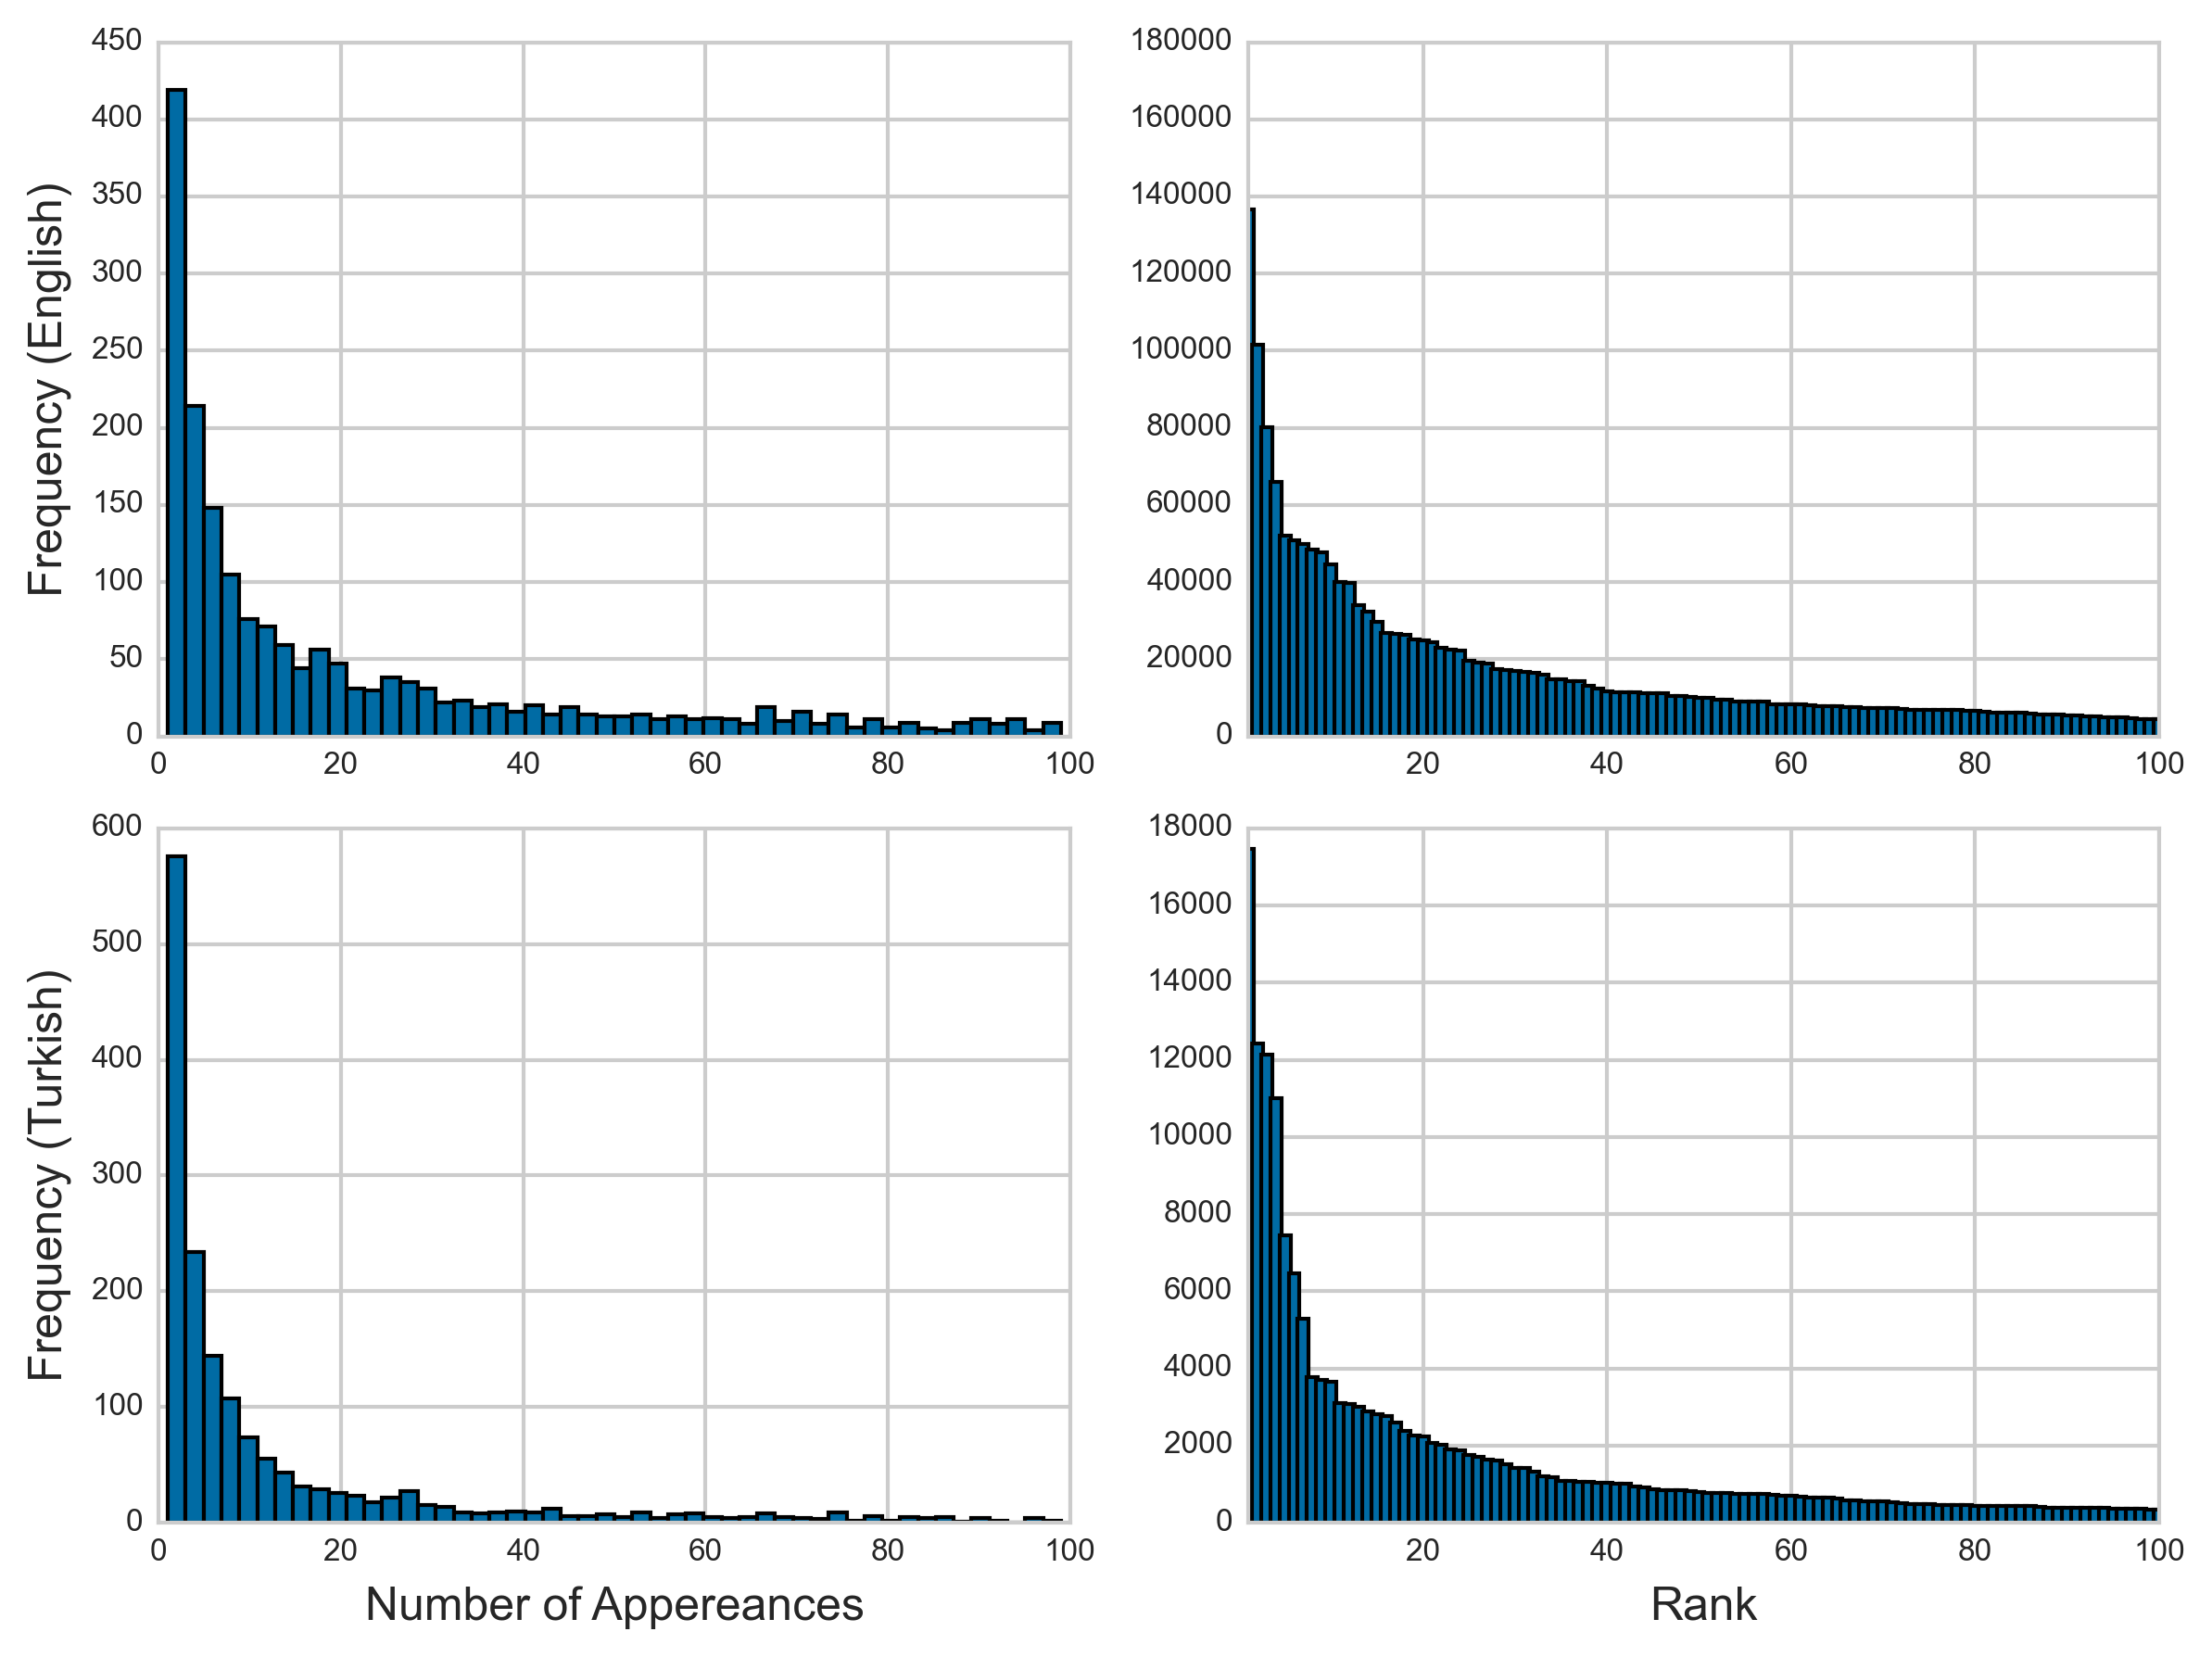

In [28]:
plt.style.use("tableau-colorblind10")
fig, ax = plt.subplots(nrows=2,ncols=2)
fig.set_dpi(300)
ax[0,0].set_ylabel("Frequency (English)")
ax[0,0].hist(groupsAndCountsDfEn[groupsAndCountsDfEn.cnt<100].cnt,bins=50)
ax[0,0].set_xlim(0,100)

dataToPlotEn = groupsAndCountsDfEn[groupsAndCountsDfEn.index<200]
ax[0,1].set_xlim([1,100])
ax[0,1].bar(x=dataToPlotEn.index,height=dataToPlotEn.cnt,width=1.2)

ax[1,0].set_ylabel("Frequency (Turkish)")
ax[1,0].hist(groupsAndCountsDfTr[groupsAndCountsDfTr.cnt<100].cnt,bins=50)
ax[1,0].set_xlabel("Number of Appereances")
dataToPlotTr = groupsAndCountsDfTr[groupsAndCountsDfTr.index<200]
ax[1,0].set_xlim([0,100])
ax[1,1].bar(x=dataToPlotTr.index,height=dataToPlotTr.cnt,width=1.2)
ax[1,1].set_xlabel("Rank")
ax[1,1].set_xlim([1,100])
plt.tight_layout()
#sns.set_style("white")
matplotlib.rcParams.update({'font.size': 8})
#ax[0,0].grid(True)
#ax[1,0].grid(True)
#ax[0,1].grid(True)
#ax[1,1].grid(True)

plt.show()

In [81]:
7/1.33

5.263157894736842

In [76]:
fig.get_figwidth()

6.4

In [77]:
fig.get_figheight()

4.8

In [78]:
6.4/4.8

1.3333333333333335

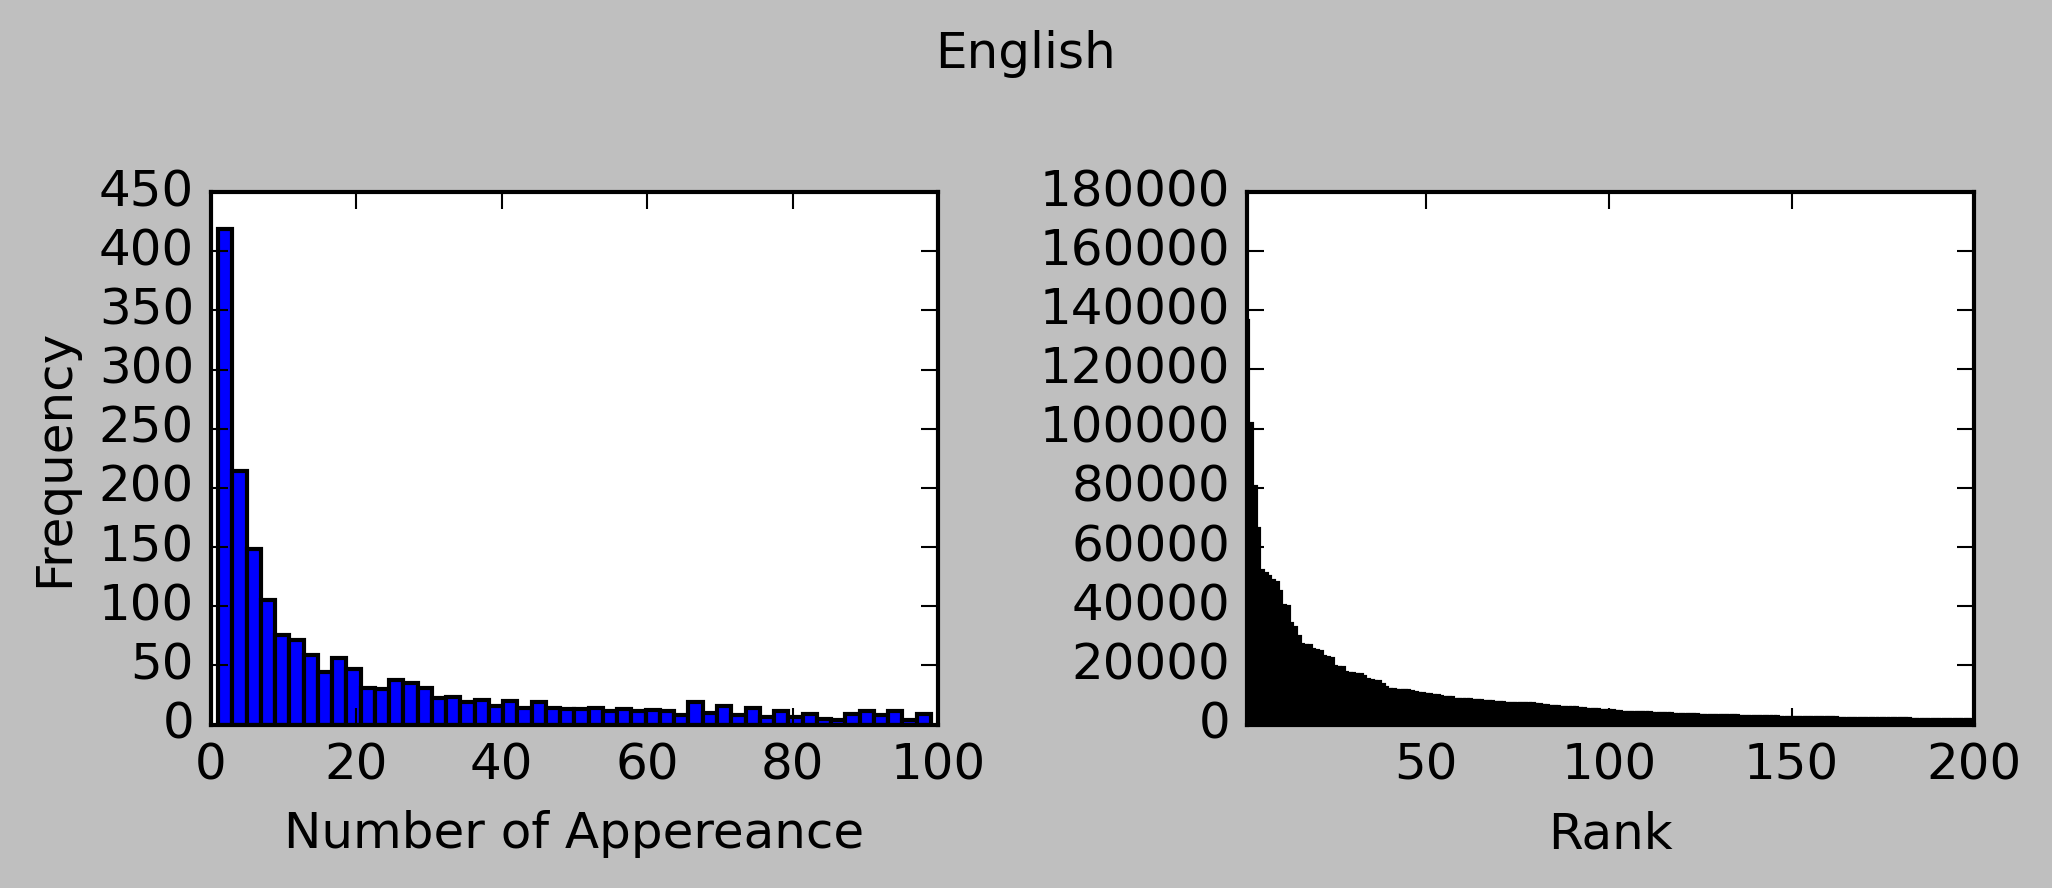

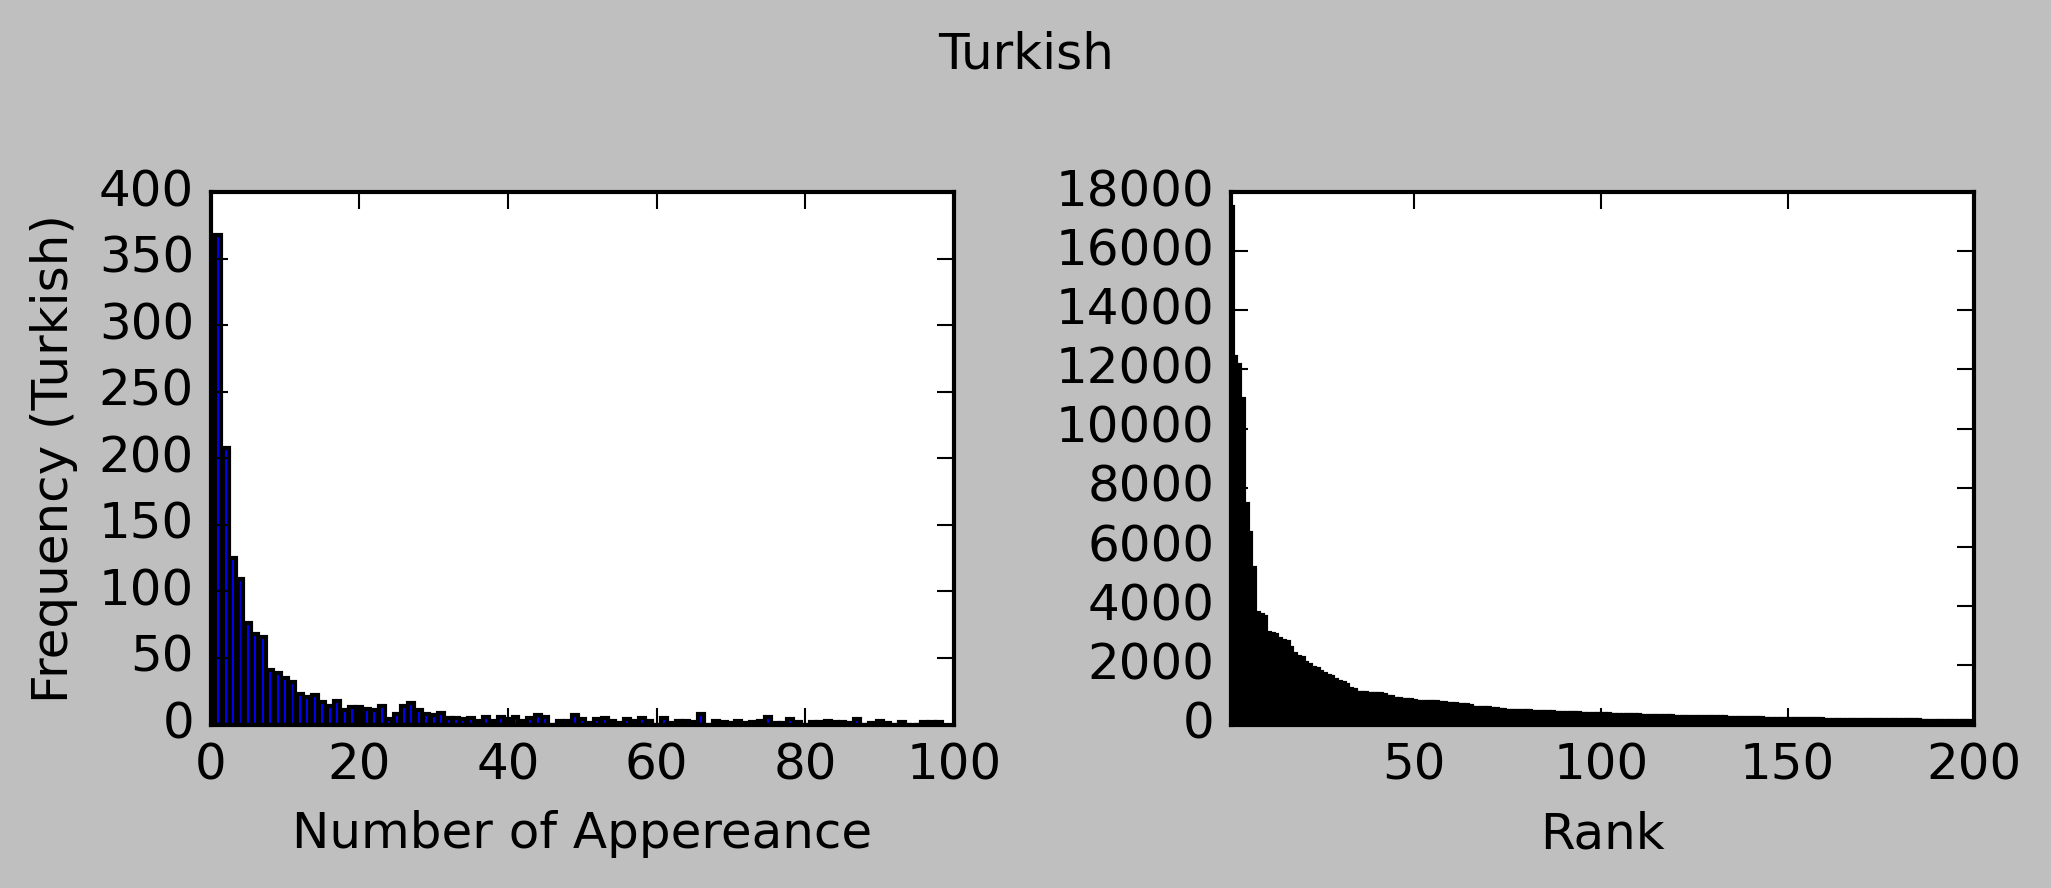

In [11]:
plt.style.use('classic')
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(7,3))
fig.suptitle('English')
#fig.supylabel('log10(Frequency)')
fig.set_dpi(300)
#histEn = np.histogram(groupsAndCountsDfEn.cnt,bins=list(range(1,100)))
#histEn = np.histogram(groupsAndCountsDfEn.cnt,bins=list(range(1,100)))
ax[0].set_xlim([0,100])
#ax[0].bar(x=histEn[1][:-1],height=histEn[0])
#ax[0].set_title('English')
ax[0].set_ylabel('Frequency')
ax[0].hist(groupsAndCountsDfEn[groupsAndCountsDfEn.cnt<100].cnt,bins=50)
ax[0].set_xlabel('Number of Appereance')
#ax[0].grid(axis='y')
#plt.bar(x=dataToPlotEn.index,height=dataToPlotEn.cnt,alpha=0.5)
dataToPlotEn = groupsAndCountsDfEn[groupsAndCountsDfEn.index<200]
ax[1].set_xlim([1,200])
ax[1].bar(x=dataToPlotEn.index,height=dataToPlotEn.cnt)
#ax[1].set_title('English')
#ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Rank')
#ax[1].grid(axis='y')
#plt.style.use('fast')
plt.tight_layout()
#sns.set_style('dark')
#sns.set()
plt.show()


fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(7,3))
fig.suptitle('Turkish')
#fig.supylabel('log10(Frequency)')
fig.set_dpi(300)
histTr = np.histogram(groupsAndCountsDfTr.cnt,bins=list(range(1,100)))
#histEn = np.histogram(groupsAndCountsDfEn.cnt,bins=list(range(1,100)))
ax[0].set_xlim([0,100])
ax[0].bar(x=histTr[1][:-1],height=histTr[0])
#ax[0].set_title('Turkish')
ax[0].set_ylabel('Frequency (Turkish)')
ax[0].set_xlabel('Number of Appereance')
#plt.bar(x=dataToPlotEn.index,height=dataToPlotEn.cnt,alpha=0.5)
dataToPlotTr = groupsAndCountsDfTr[groupsAndCountsDfTr.index<200]
ax[1].set_xlim([1,200])
ax[1].bar(x=dataToPlotTr.index,height=dataToPlotTr.cnt)
#ax[1].set_title('Turkish')
#ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Rank')

plt.tight_layout()

#sns.set_style('whitegrid')
#sns.set()
plt.show()

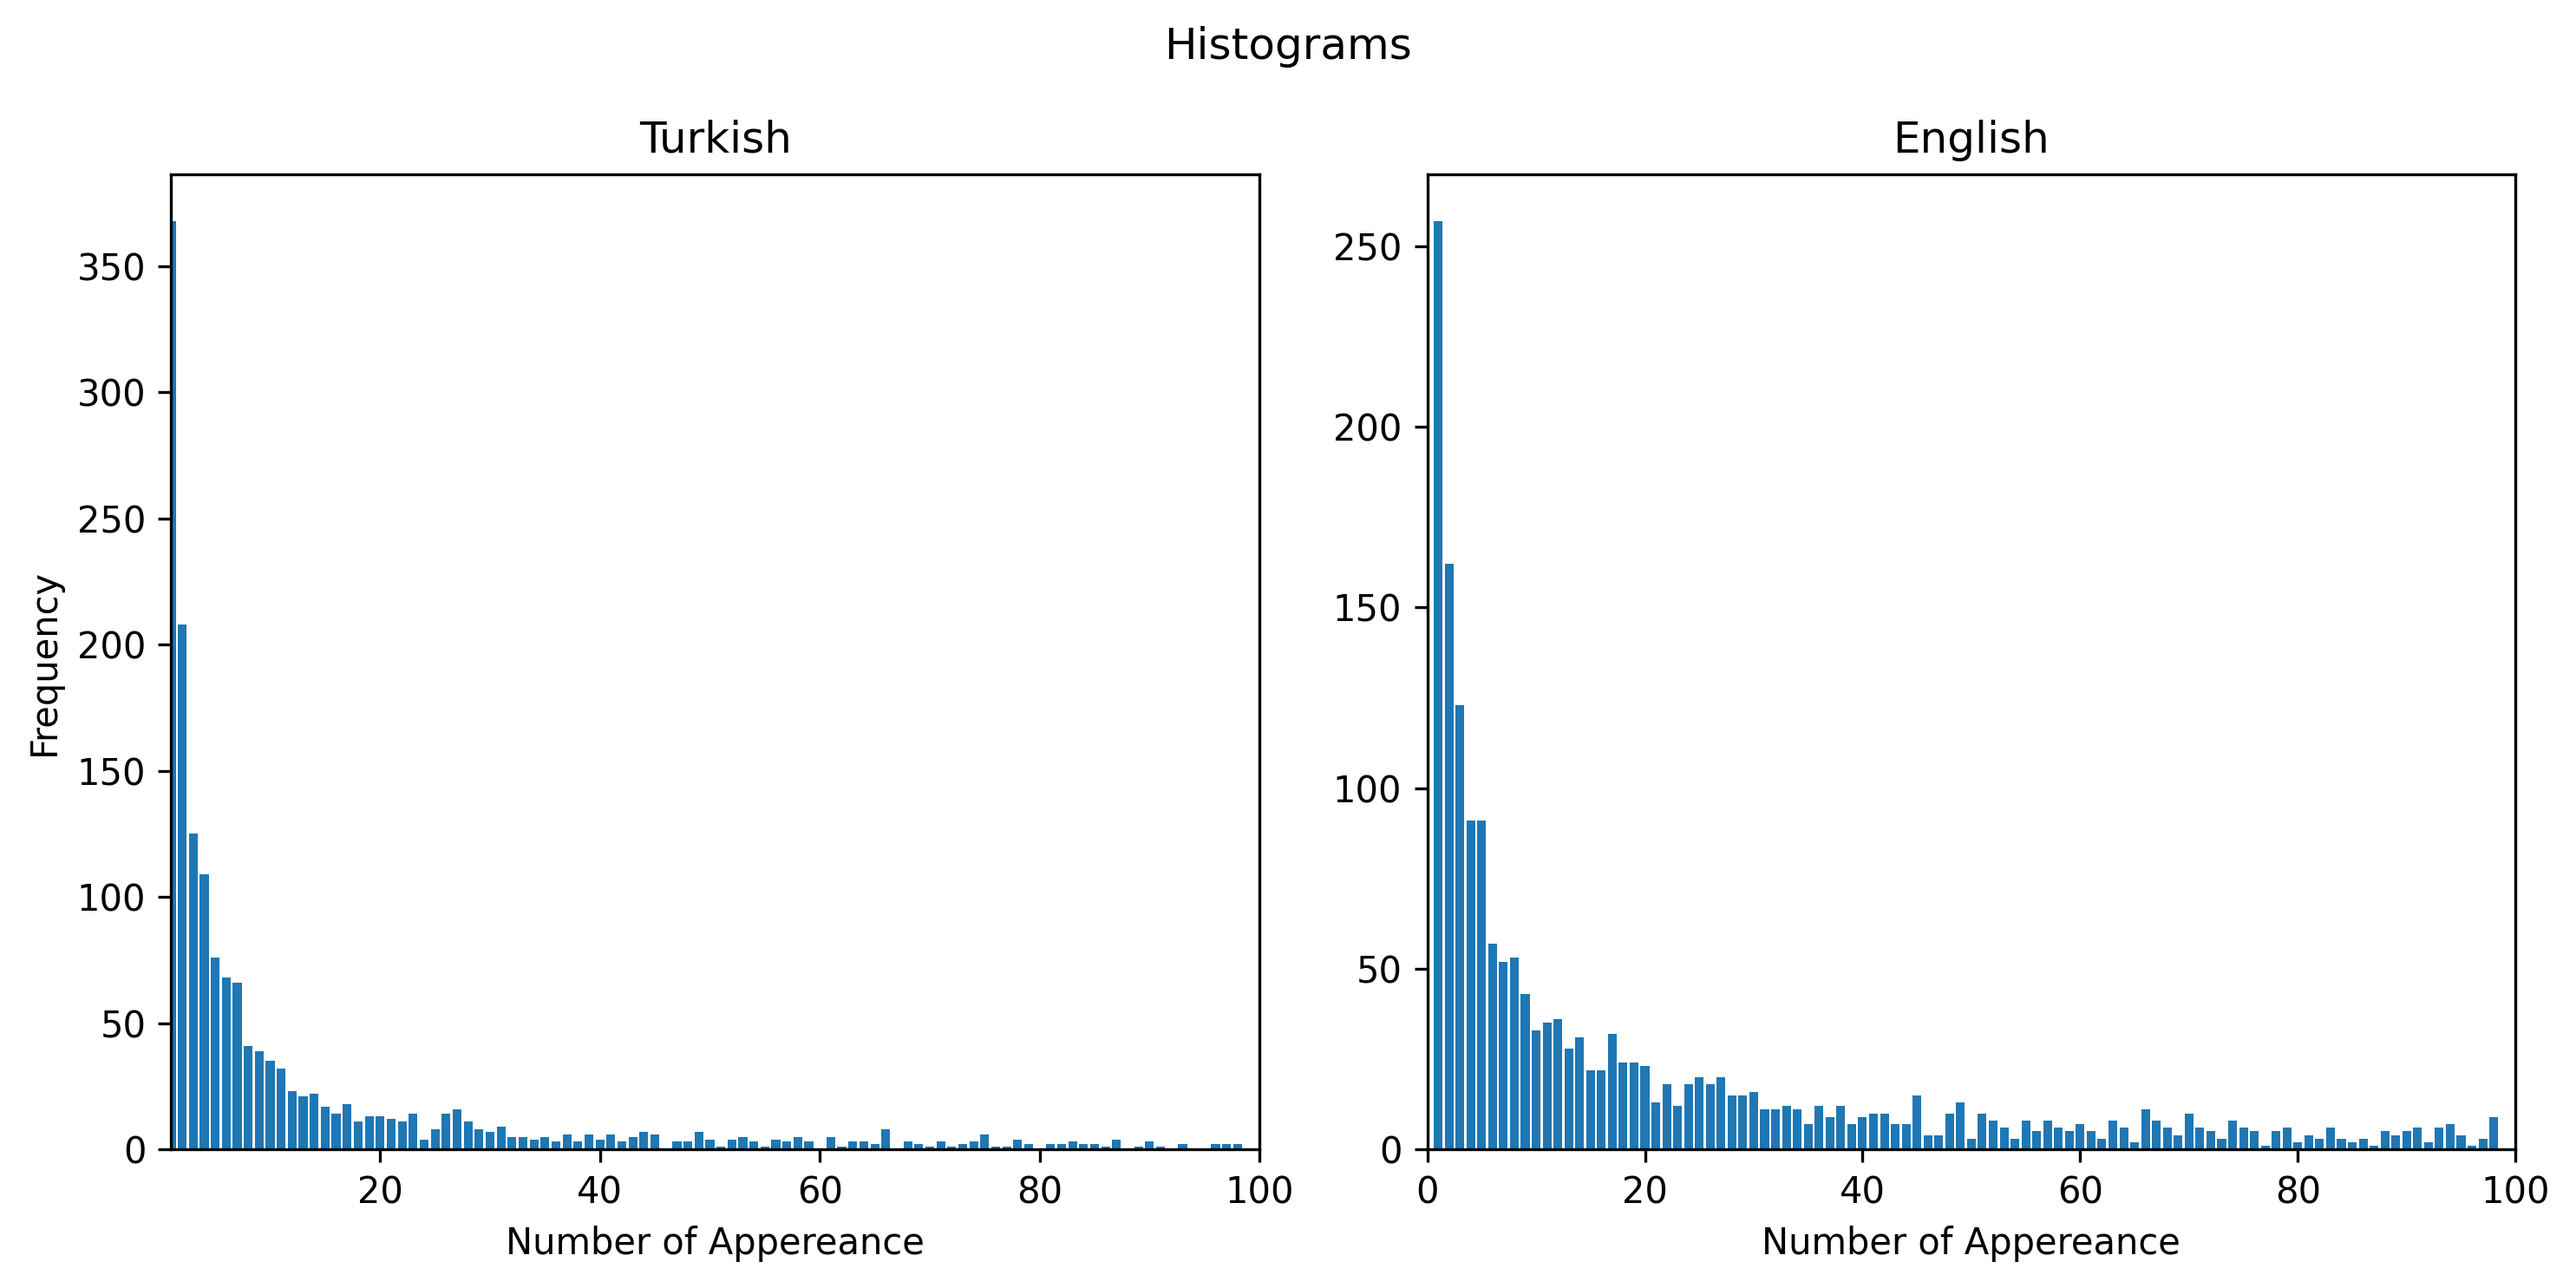

In [33]:

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5),)
fig.suptitle('Histograms')
#fig.supylabel('log10(Frequency)')
fig.set_dpi(300)
histTr = np.histogram(groupsAndCountsDfTr.cnt,bins=list(range(1,100)))
histEn = np.histogram(groupsAndCountsDfEn.cnt,bins=list(range(1,100)))
ax[0].set_xlim([1,100])
ax[0].bar(x=histTr[1][:-1],height=histTr[0])
ax[0].set_title('Turkish')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Number of Appereance')
#plt.bar(x=dataToPlotEn.index,height=dataToPlotEn.cnt,alpha=0.5)
ax[1].bar(x=histEn[1][:-1],height=histEn[0])
ax[1].set_title('English')
ax[1].set_xlabel('Number of Appereance')
ax[1].set_xlim([0,100])
plt.style.use('fast')
plt.tight_layout()

#sns.set_style('dark')
#sns.set()
plt.show()

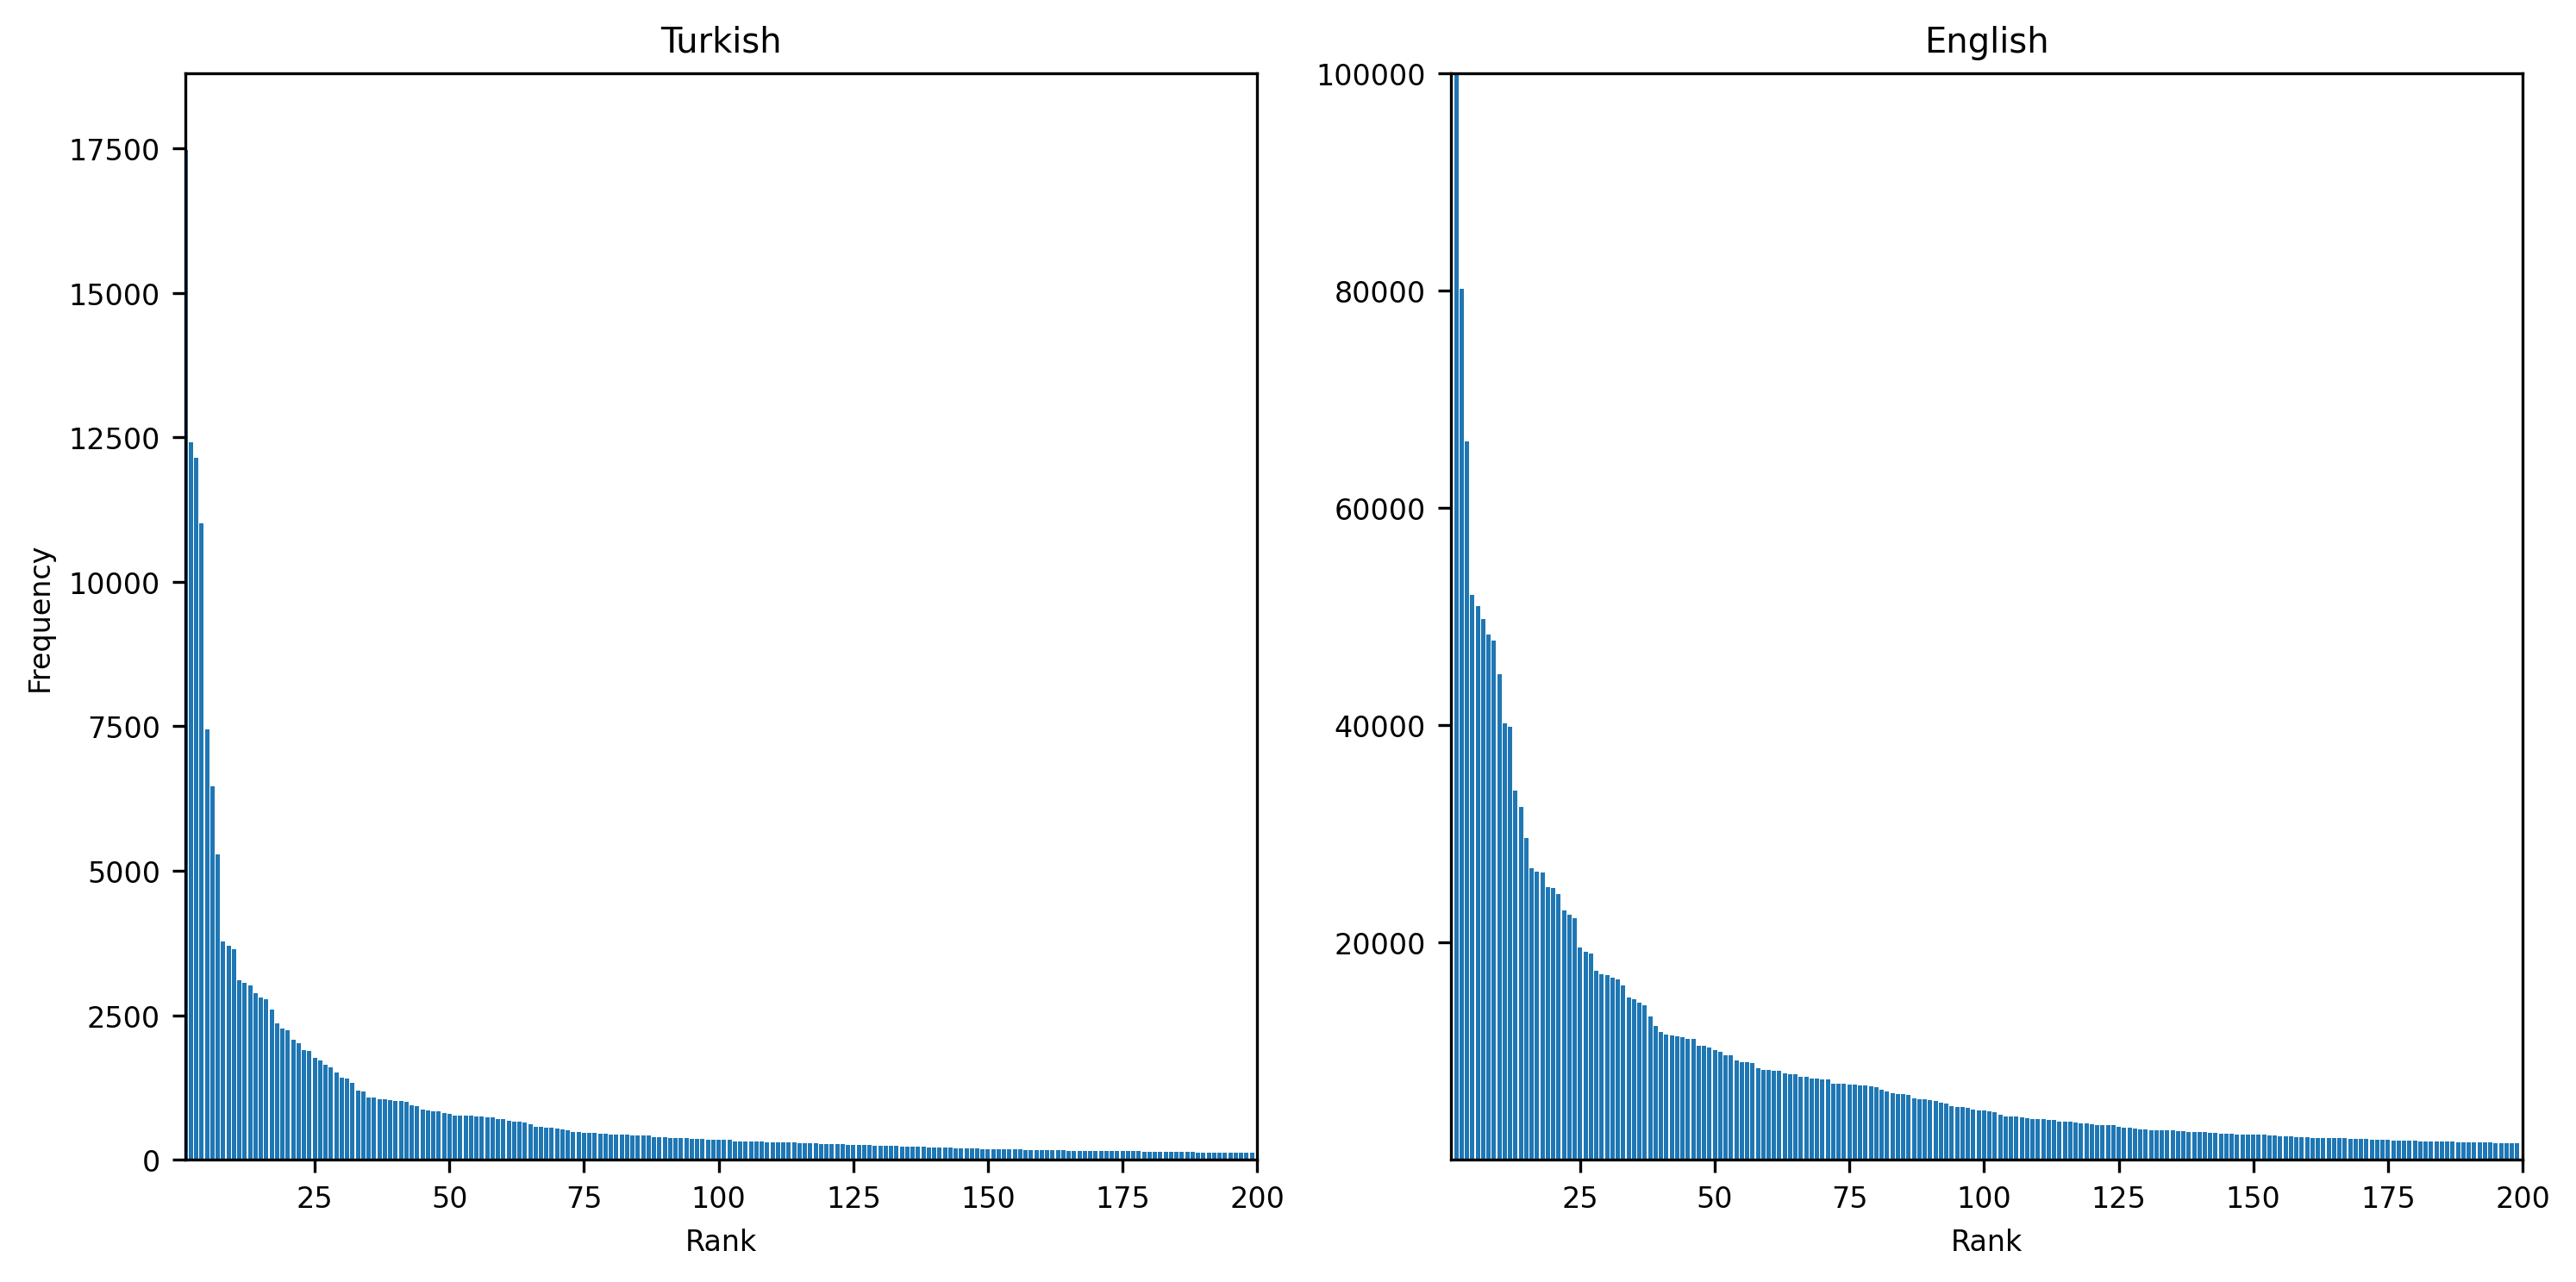

In [5]:
#Rank plot

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
#plt.style.use('seaborn-whitegrid')
fig.set_dpi(300)
dataToPlotTr = groupsAndCountsDfTr[groupsAndCountsDfTr.index<200]
ax[0].set_xlim([1,200])
ax[0].bar(x=dataToPlotTr.index,height=dataToPlotTr.cnt)
ax[0].set_title('Turkish')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Rank')
#plt.bar(x=dataToPlotEn.index,height=dataToPlotEn.cnt,alpha=0.5)
dataToPlotEn = groupsAndCountsDfEn[groupsAndCountsDfEn.index<200]
ax[1].set_xlim([1,200])
ax[1].set_ylim([1,100000])
ax[1].bar(x=dataToPlotEn.index,height=dataToPlotEn.cnt)
ax[1].set_title('English')
ax[1].set_xlabel('Rank')
plt.tight_layout()
plt.show()


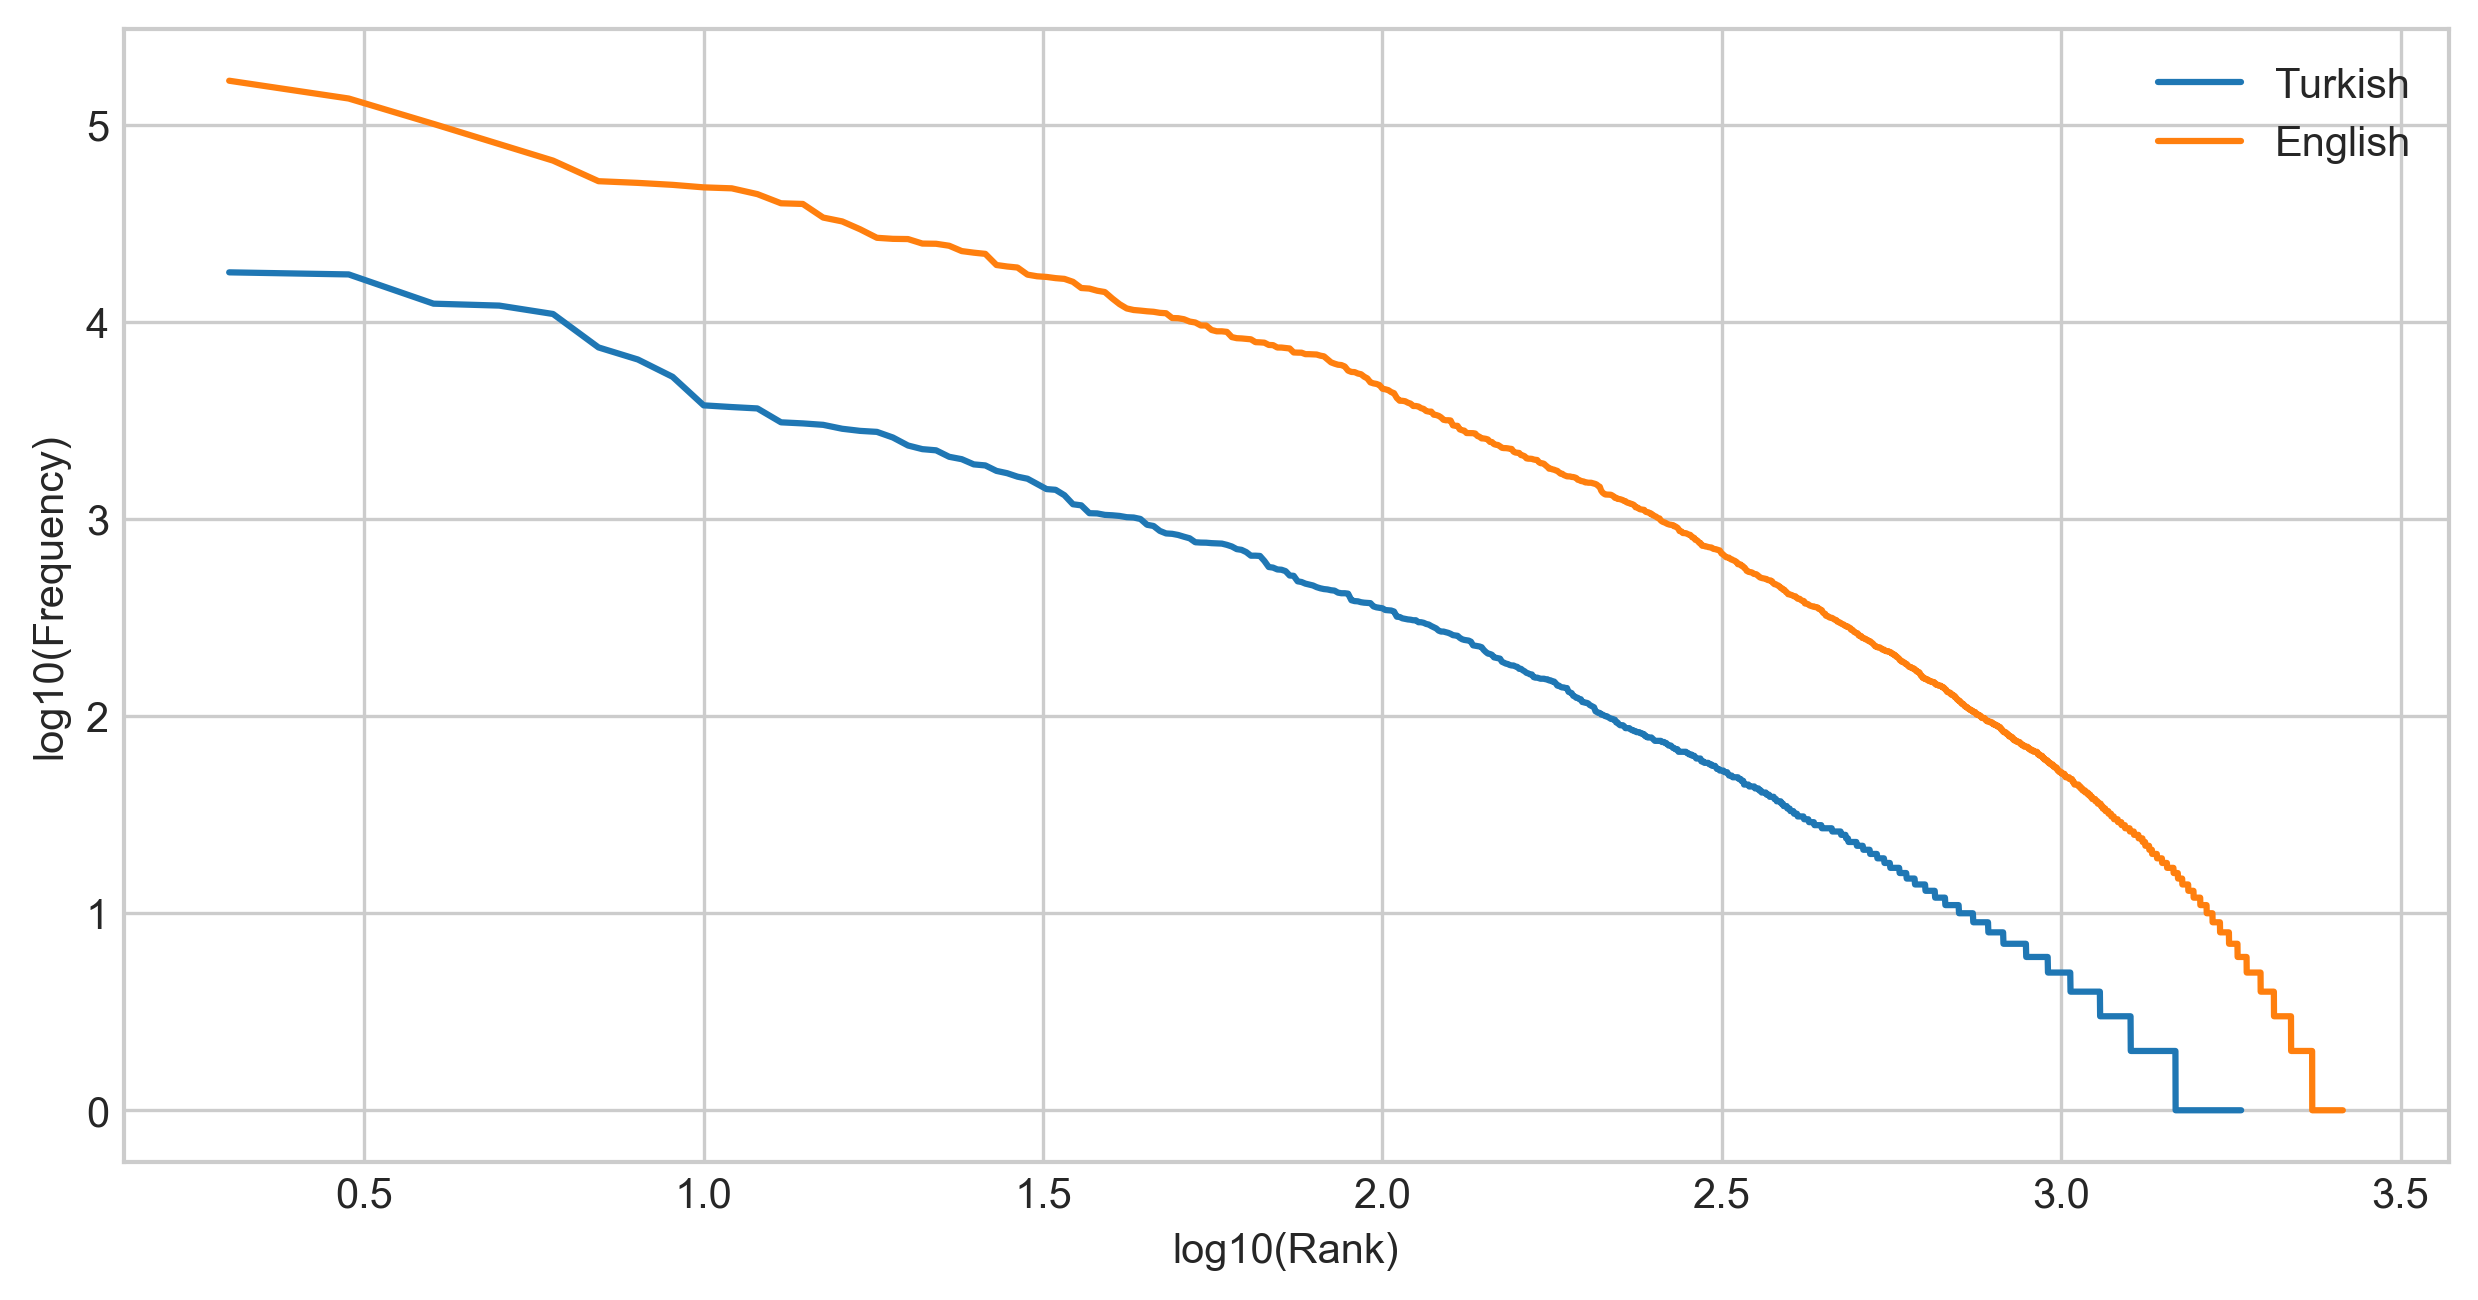

In [5]:

plt.style.use('seaborn-whitegrid')
dataCountsTr = groupsAndCountsDfTr
dataCountsEn = groupsAndCountsDfEn
plt.figure(figsize=(10,5),dpi=300)
dataCountsTr.index = dataCountsTr.index+1
dataCountsEn.index = dataCountsEn.index+1

plt.plot(np.log10(dataCountsTr.index),np.log10(dataCountsTr.cnt),label="Turkish")
plt.plot(np.log10(dataCountsEn.index),np.log10(dataCountsEn.cnt),label='English')
plt.xlabel("log10(Rank)")
plt.ylabel('log10(Frequency)')
#plt.title('Distribution of Emoticons by Rank')
plt.legend()
plt.show()

##### Checking for 10-90% pareto like distribution

first part: 10-90%

second : the distribution changes

In [74]:
groupsAndCountsDfTr[groupsAndCountsDfTr.index<191].cnt.sum()/groupsAndCountsDfTr.cnt.sum()

0.8990833123605666

In [72]:
190/(len(groupsAndCountsDfTr)-368)

0.12907608695652173

In [146]:
len(groupsAndCountsDfTr)

1840

In [66]:
len(groupsAndCountsDfTr[groupsAndCountsDfTr.cnt==1])

368

In [89]:
#rest 10%

groupsAndCountsDfTr[(groupsAndCountsDfTr.index >190) & (groupsAndCountsDfTr.index <900)].cnt.sum()/groupsAndCountsDfTr[groupsAndCountsDfTr.index >190].cnt.sum()

0.9018091131963818

In [100]:
(900-190)/len(groupsAndCountsDfTr[groupsAndCountsDfTr.index >190])

0.4295220810647308

90% of the total emoticon usage is created by 20% of the distinct emoticons for Turkish 

In [58]:
groupsAndCountsDfEn[groupsAndCountsDfEn.index<230].cnt.sum()/groupsAndCountsDfEn.cnt.sum()

0.9033678253839935

In [59]:
230/len(groupsAndCountsDfEn)

0.08852963818321787

90% of the total emoticon usage is created by 10% of the distinct emoticons for English , when single counts are removed then it is very close to 90-10

In [63]:
len(groupsAndCountsDfEn[groupsAndCountsDfEn.cnt==1])

257

In [64]:
230/(len(groupsAndCountsDfEn) - 257)

0.09824861170439983

In [104]:
# rest medium popularity


groupsAndCountsDfEn[(groupsAndCountsDfEn.index>230) & (groupsAndCountsDfEn.index<900)].cnt.sum()/groupsAndCountsDfEn[(groupsAndCountsDfEn.index>230)].cnt.sum()

0.8902759499312543

In [105]:

(900-230)/len(groupsAndCountsDfEn[(groupsAndCountsDfEn.index>230)])




0.28258118937157317

In [49]:
print('English total:',len(groupsAndCountsDfEn))
print('Turkish total:',len(groupsAndCountsDfTr))




English total: 2598
Turkish total: 1840


#### Lexical Diversity of Emoticons Across Cultures

In order for not being affected by corpus size, divide messages into same sized chunks/pages (ie:Each containin 10.000),

Count emoticons in each chunk and calculate distinct count/all count

Finally, normalize by page size

In [33]:
def getDiversity(N,mtrx,featureNames):
    pagesize = int(mtrx.shape[0]/N)
    dives =[]
    prevpage = 0
    currentpage=1
    for page in range(1,pagesize+1):
        countsData=pd.DataFrame(mtrx[prevpage*N:currentpage*N].sum(axis=0).T,index=featureNames).sort_values(by=0,ascending=False)
        if(len(countsData)>0 and countsData.sum()[0]>0):
            diversity = len(countsData[countsData[0]>0])/countsData.sum()[0]
            dives.append(diversity)
            #else:
            #    divesTr.append(0)
        prevpage+=1
        currentpage+=1            
    return dives


In [34]:
divesTr = getDiversity(1000,cscCountsMatrixTr,featureNamesArrayTr)

In [35]:
divesEn = getDiversity(1000,cscCountsMatrixEn,featureNamesArrayEn)

In [17]:
plt.style.use('seaborn-whitegrid')

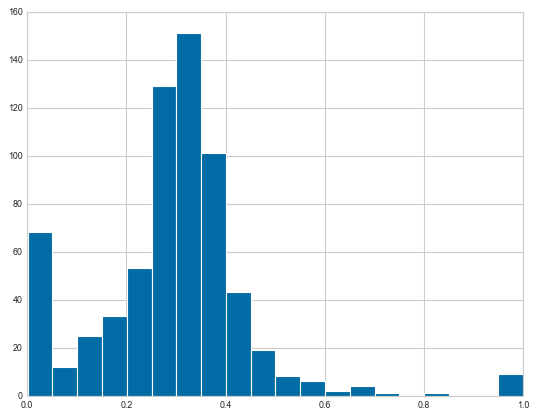

In [36]:
plt.hist(divesTr,bins=20)
plt.show()

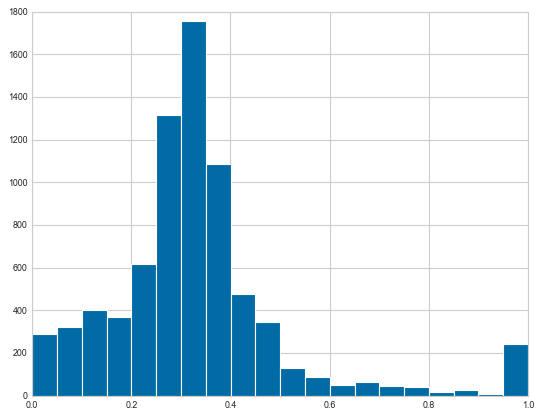

In [37]:
plt.hist(divesEn,bins=20)
plt.show()

In [12]:
print('English Diversity:',np.mean(divesEn))
print('Turkish Diversity:',np.mean(divesTr))

English Diversity: 0.3302349679344071
Turkish Diversity: 0.2935997063934076


In [19]:
import pickle

with open(path_root + 'en_diversity.pkl', 'wb') as f:
    pickle.dump(divesEn, f)

with open(path_root + 'tr_diversity.pkl', 'wb') as f:
    pickle.dump(divesTr, f)

In [60]:
import pickle
divesEn = pickle.load(open(path_root +'en_diversity.pkl', 'rb'))
divesTr = pickle.load(open(path_root +'tr_diversity.pkl', 'rb'))

In [67]:
scipy.stats.ttest_ind(a=divesTr,b=divesEn,equal_var=False)

Ttest_indResult(statistic=-5.712591992136814, pvalue=1.5492696094385104e-08)

In [16]:
np.array(divesTr).std()

0.15616187336411647

In [17]:
np.array(divesEn).std()

0.18392615827701342

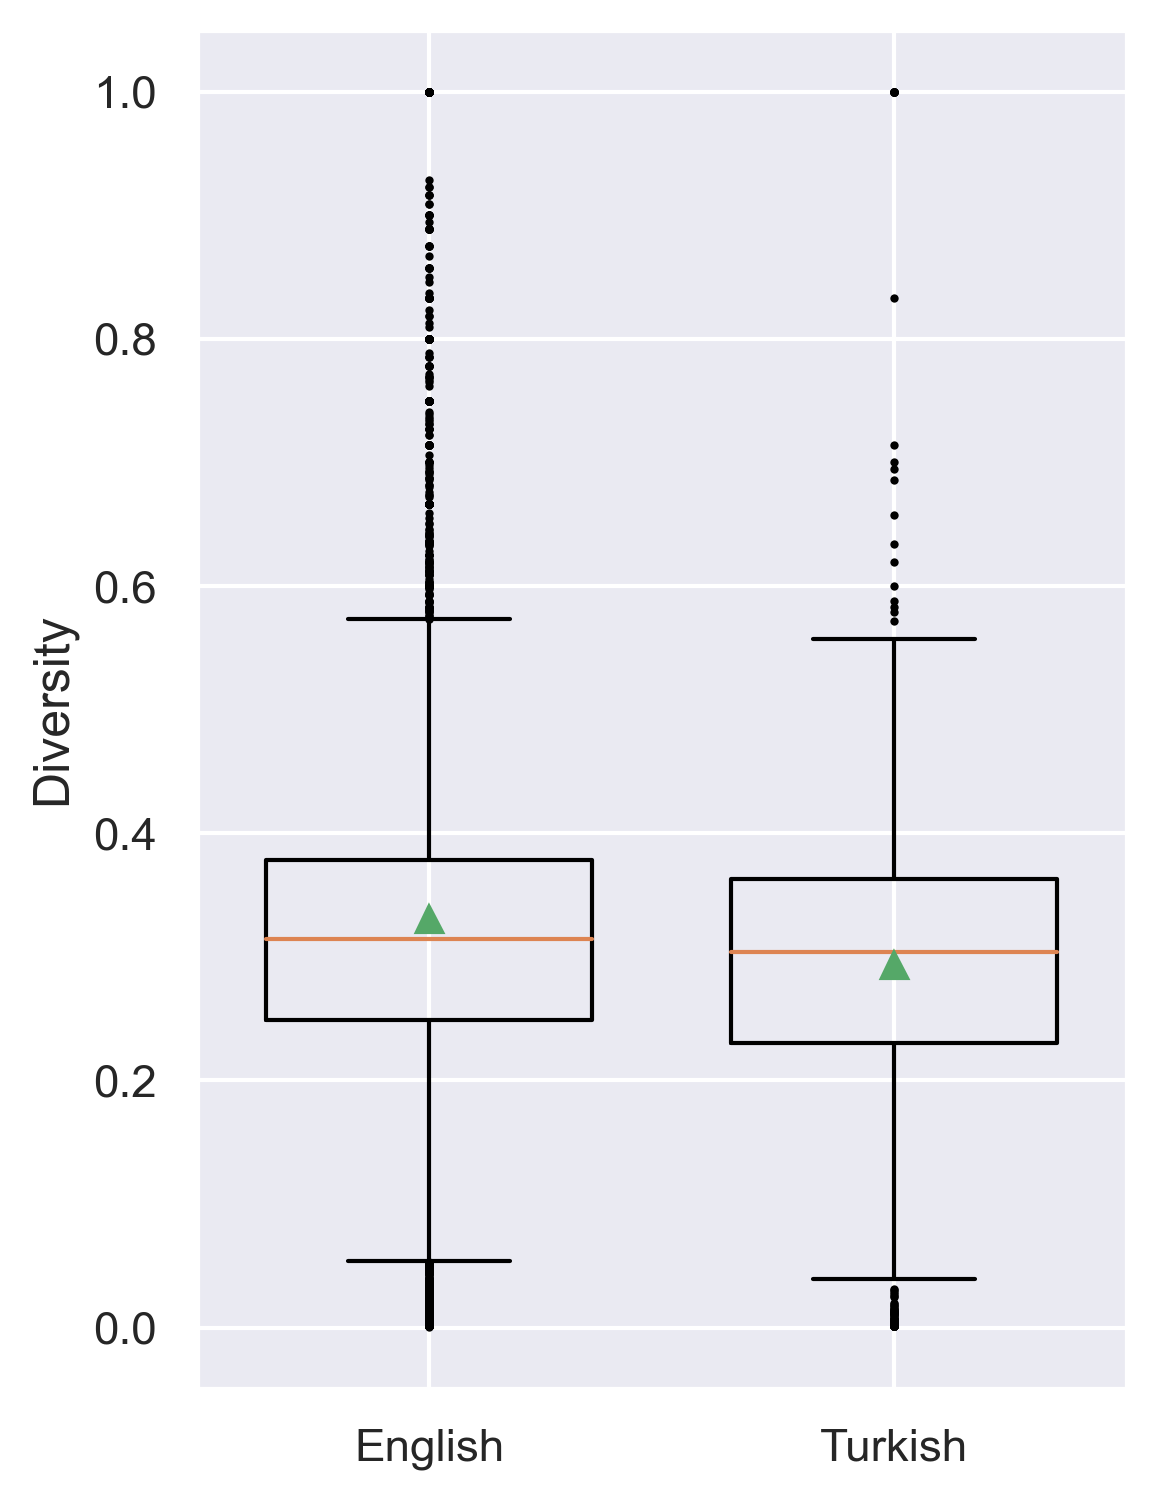

In [18]:

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(4,6),sharey=True)
fig.set_dpi(300)
flierprops = dict(marker='o', markerfacecolor='black', markersize=2,markeredgecolor='none')
ax.boxplot([divesEn,divesTr],flierprops=flierprops,labels=['English','Turkish'],
widths=0.7, showmeans=True, )
plt.ylabel('Diversity')
plt.show()

In [409]:
len([val for val in divesTr if val>0])

665

##### Diversity by months

In [38]:
dfTr['period']= pd.to_datetime(dfTr.created_at).dt.to_period('M')
dfEn['period']= pd.to_datetime(dfEn.created_at).dt.to_period('M')

grpDataTr = dfTr.groupby(by='period')
grpDataEn = dfEn.groupby(by='period')

/Users/atanaltay/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1146: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


In [39]:
X_en,X_tr = [],[]
y=[]

for group in grpDataTr:
    indicesTr = grpDataTr.get_group(group[0])
    indicesEn = grpDataEn.get_group(group[0])


    #cscCountsMatrixTr[indicesTr.index,:]
    #cscCountsMatrixEn[indicesEn.index,:]
    divesTrM = np.array(getDiversity(1000,cscCountsMatrixTr[indicesTr.index,:],featureNamesArrayTr))
    divesEnM = np.array(getDiversity(1000,cscCountsMatrixEn[indicesEn.index,:],featureNamesArrayEn))
    
    meanTr = np.mean(divesTrM)
    meanEn = np.mean(divesEnM)
    X_en.append(meanTr)
    X_tr.append(meanEn)
    y.append(pd.to_datetime(group[0].strftime('%Y-%m-%d')))
    
X_en = np.array(X_en)
X_tr = np.array(X_tr)
y=np.array(y)


/Users/atanaltay/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/atanaltay/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [40]:
X_en[0:100]

array([0.43960644, 0.43982669, 0.42188351, 0.48331464, 0.40154747,
       0.30314019, 0.44307018, 0.42423025, 0.40038782, 0.440484  ,
       0.40991   , 0.38932579, 0.46624572, 0.37010818, 0.43410314,
       0.39536471, 0.38987082, 0.46855994, 0.41507383, 0.34792019,
       0.35305439, 0.3177687 , 0.32542292, 0.30952846, 0.32821153,
       0.33286167, 0.33835598, 0.2131791 , 0.36116617, 0.32997399,
       0.353422  , 0.3744331 , 0.33064398, 0.29641878, 0.3694699 ,
       0.31683863, 0.32562918, 0.30105784, 0.30966228, 0.31996105,
       0.32543884, 0.40743505, 0.32791554, 0.3389437 , 0.28262411,
       0.31276572, 0.23634982, 0.18027664, 0.23671791, 0.25990621,
       0.30611102, 0.30925101, 0.3144762 , 0.29757798, 0.30237943,
       0.25937651, 0.30969716, 0.28607488, 0.28084997, 0.29877059,
       0.30256666, 0.31687689, 0.29897614, 0.24952484, 0.26603403,
              nan])

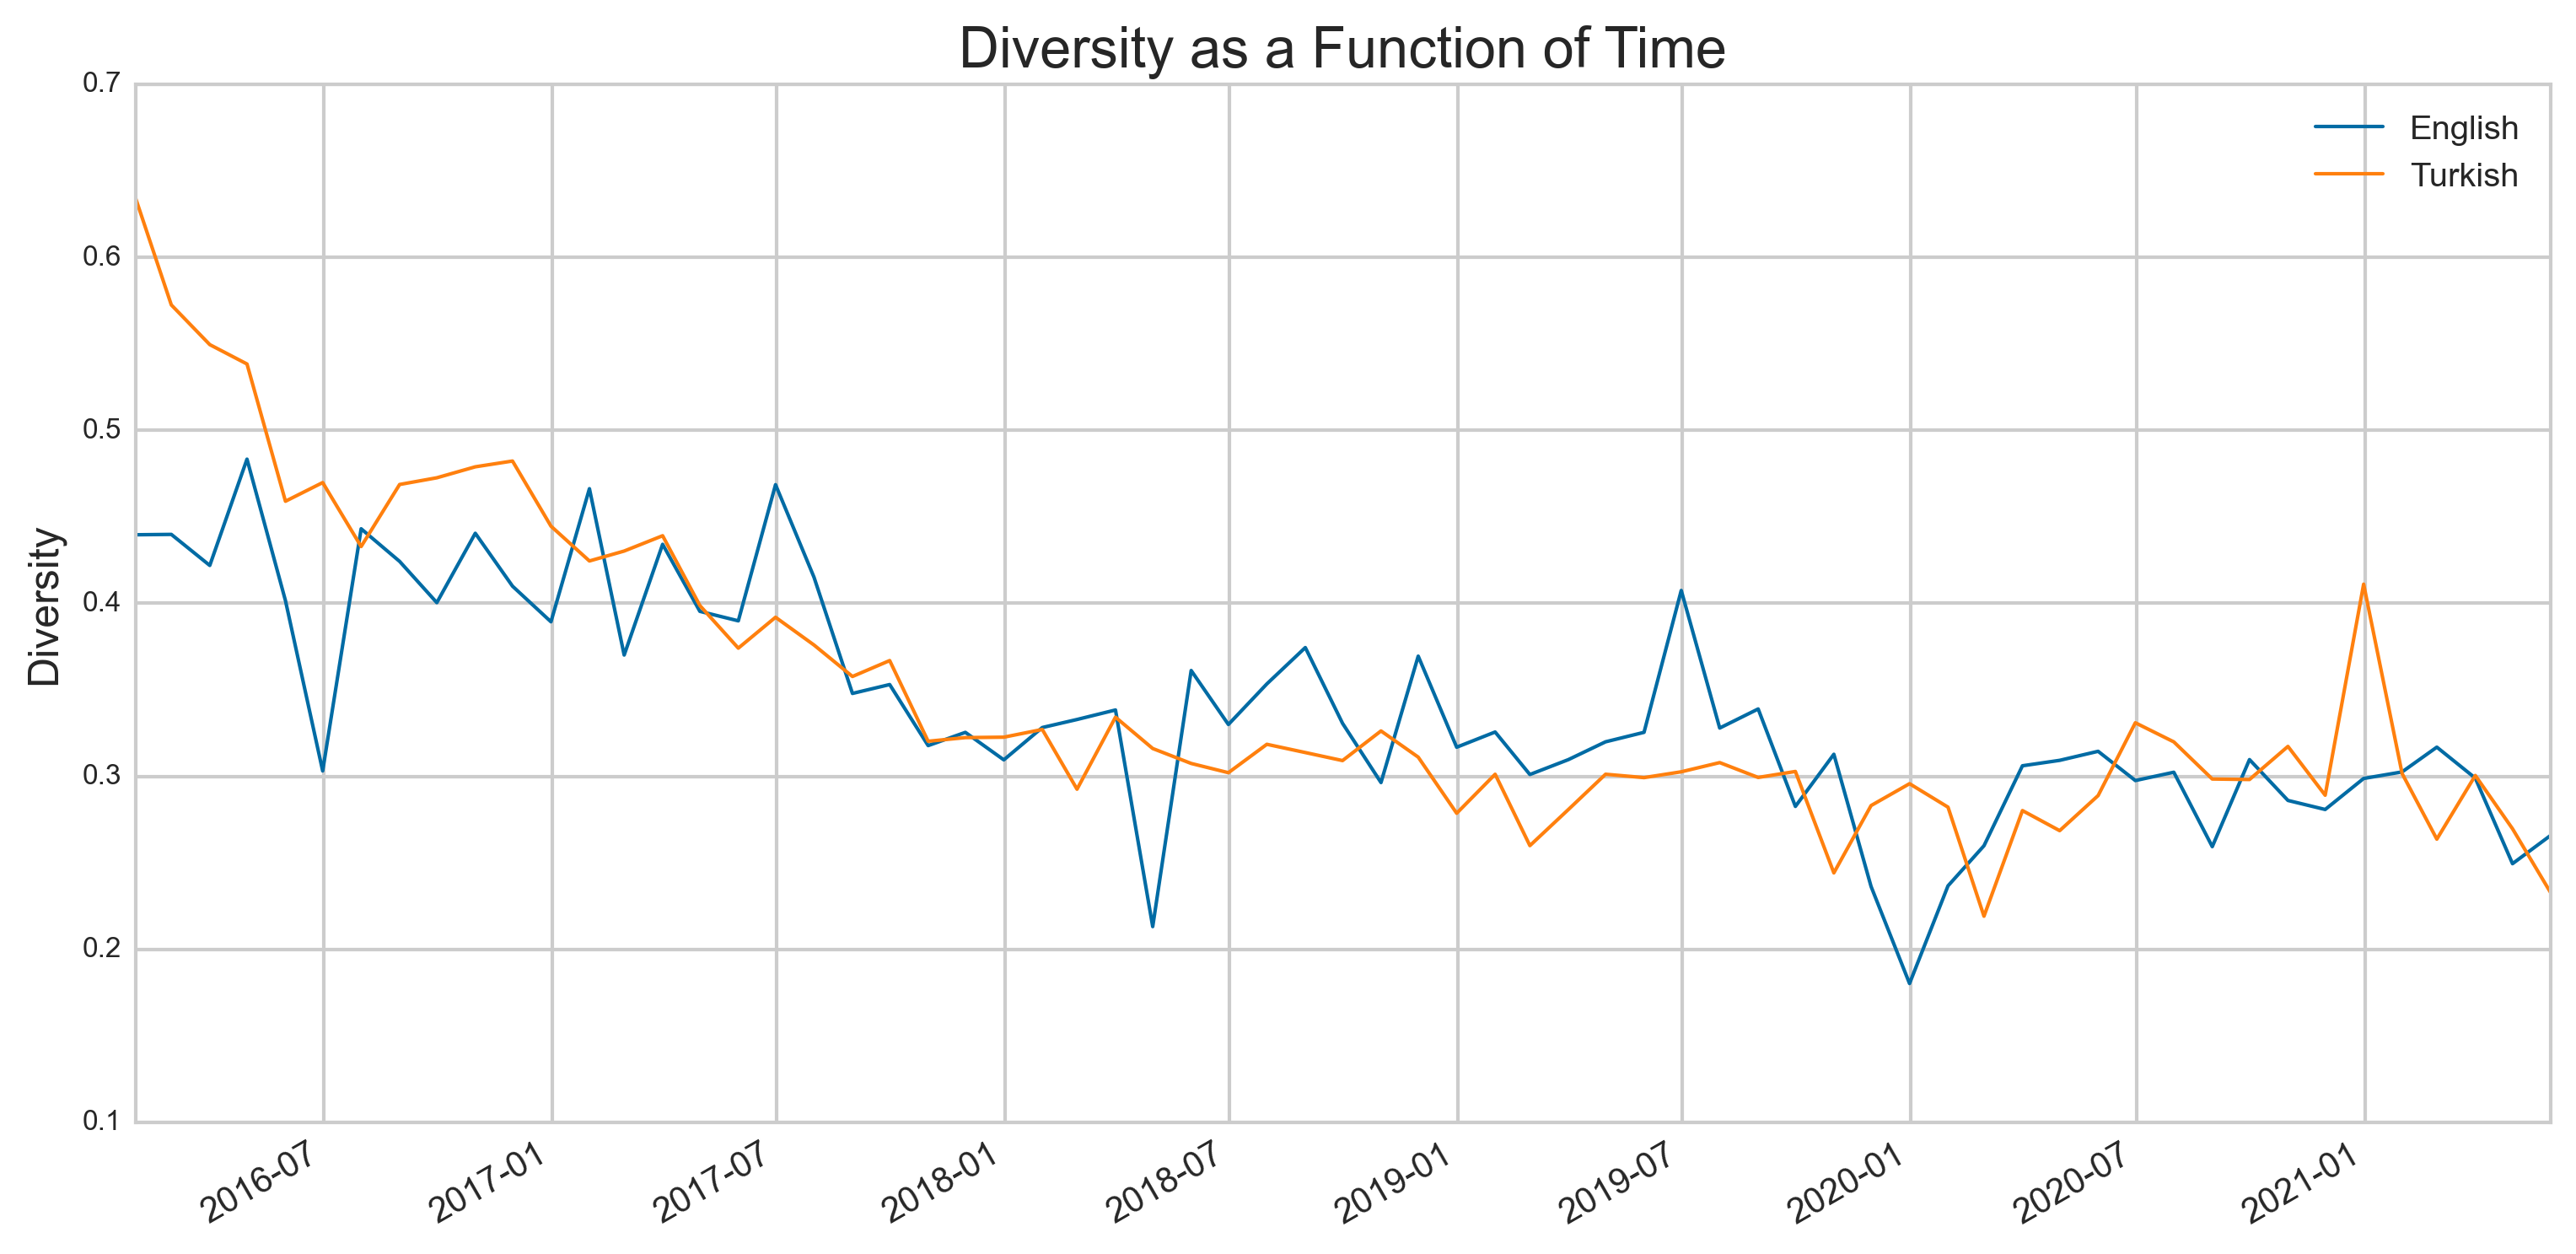

In [41]:
import matplotlib.dates as mdates
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(10,5))
fig.set_dpi(300)
#ax.plot(y[:-1],X0[:-1],label="Highest")
ax.plot(y[:-1],X_en[:-1],label="English",lw=1)
ax.plot(y[:-1],X_tr[:-1],label="Turkish",lw=1)


ax.grid(True)
months = mdates.MonthLocator()  # every month
years = mdates.MonthLocator(bymonth=[1,7])
years_fmt = mdates.DateFormatter('%Y-%m')
# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)


ax.set_title('Diversity as a Function of Time')

# Text in the x axis will be displayed in 'YYYY-mm' format.
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
# Rotates and right-aligns the x labels so they don't crowd each other.


for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right',fontsize=10)

plt.tight_layout()
plt.ylabel('Diversity')
plt.legend(loc='best')
plt.show()




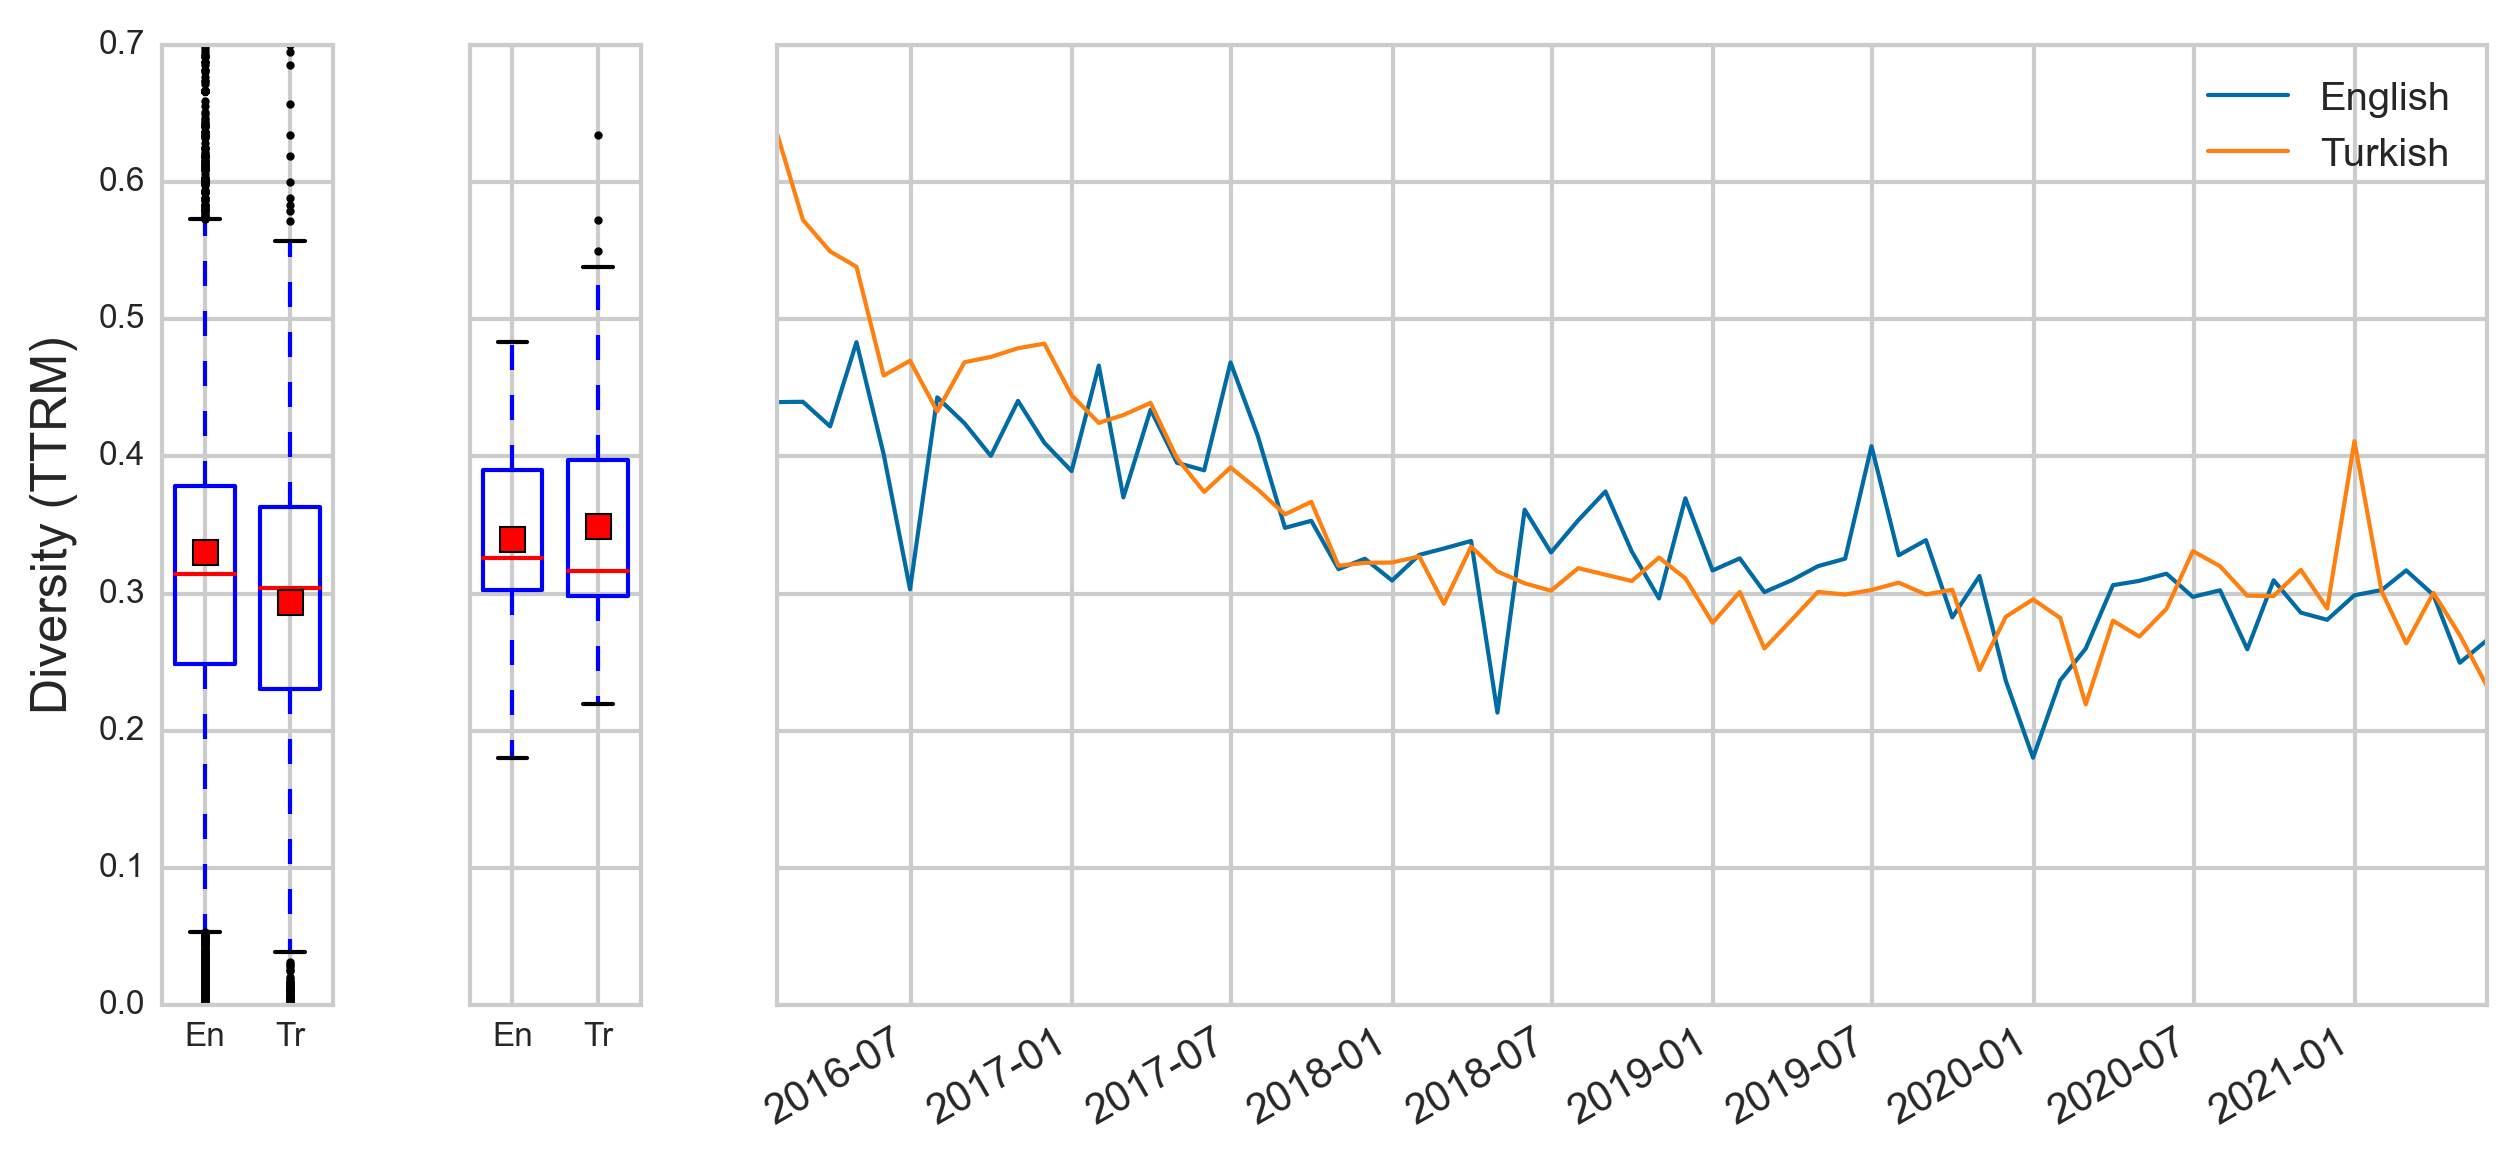

In [53]:
sns.set_style("whitegrid")
fig,ax = plt.subplots(nrows=1,ncols=3,sharey=True,gridspec_kw={'width_ratios': [1, 1,10]},figsize=(10,4))
fig.set_dpi(300)
flierprops = dict(marker='o', markerfacecolor='black', markersize=2,markeredgecolor='none')
ax[0].boxplot([divesEn,divesTr],flierprops=flierprops,labels=['En','Tr'],
widths=0.7, showmeans=True )
ax[0].set_ylabel("Diversity (TTRM)")
ax[1].boxplot([X_en[~np.isnan(X_en)],X_tr[~np.isnan(X_tr)]],flierprops=flierprops,labels=['En','Tr'],
widths=0.7, showmeans=True, )

ax[2].plot(y[:-1],X_en[:-1],label="English",lw=1)
ax[2].plot(y[:-1],X_tr[:-1],label="Turkish",lw=1)


#ax.grid(True)
months = mdates.MonthLocator()  # every month
years = mdates.MonthLocator(bymonth=[1,7])
years_fmt = mdates.DateFormatter('%Y-%m')
# format the ticks
ax[2].xaxis.set_major_locator(years)
ax[2].xaxis.set_major_formatter(years_fmt)
ax[2].xaxis.set_minor_locator(months)



#ax.set_title('Diversity as a Function of Time')

# Text in the x axis will be displayed in 'YYYY-mm' format.
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
# Rotates and right-aligns the x labels so they don't crowd each other.


for label in ax[2].get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right',fontsize=10)




#plt.ylabel('Diversity')
plt.legend()
plt.ylim([0,0.7])
plt.show()

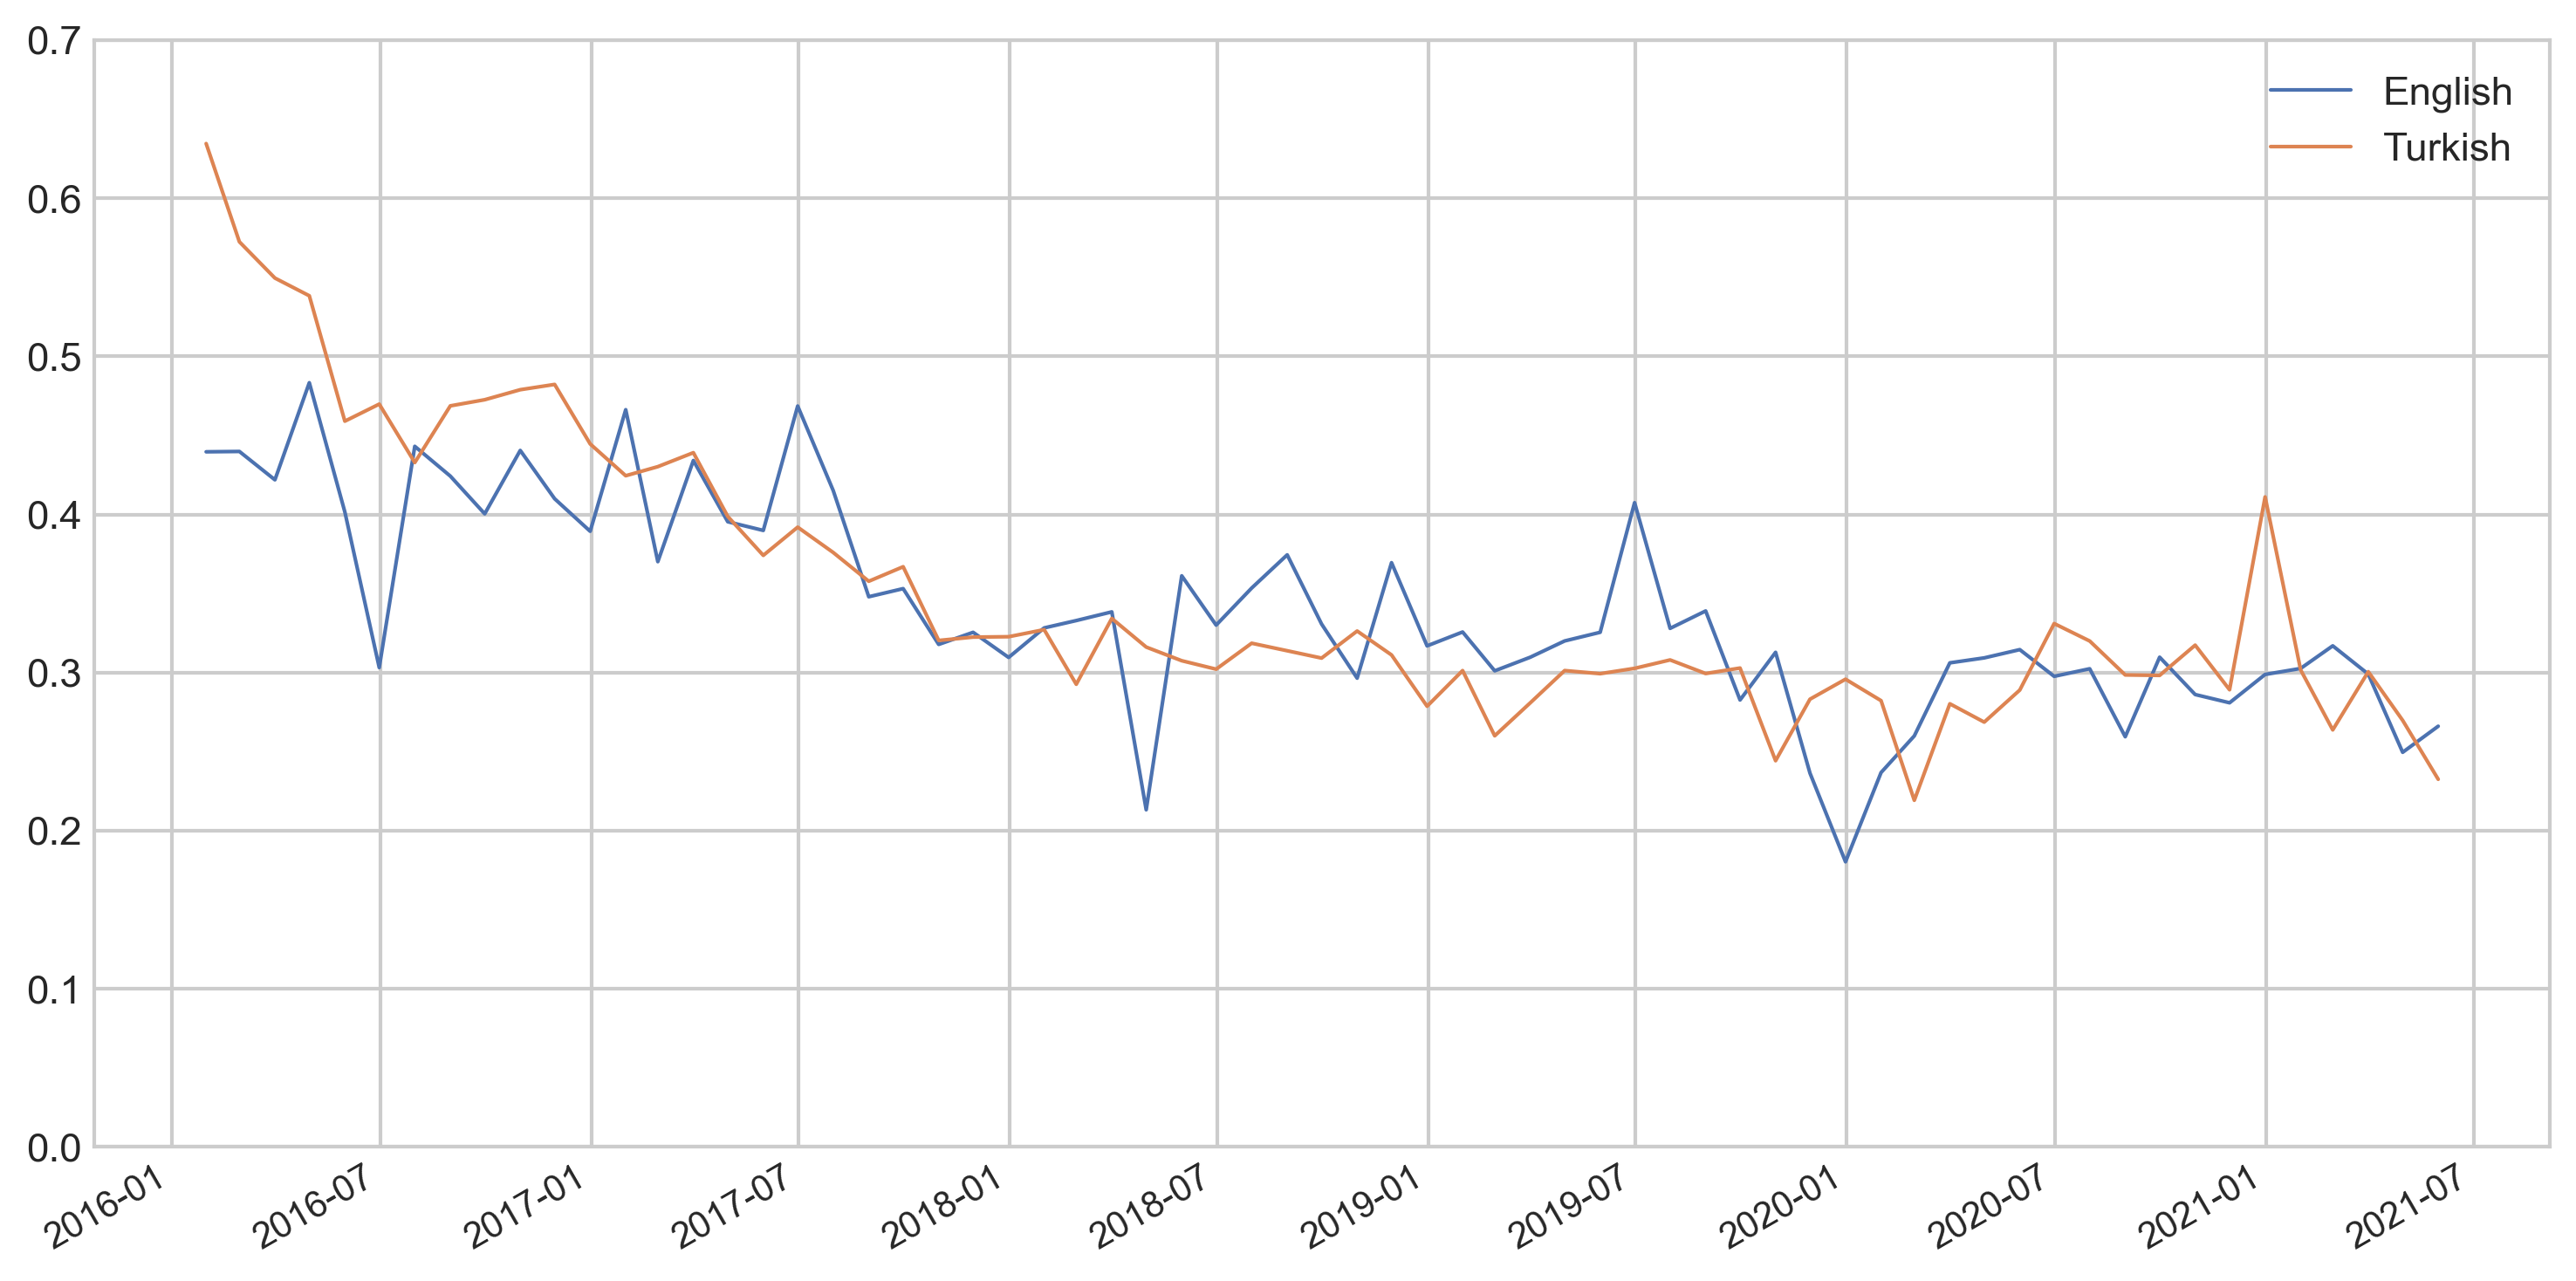

In [54]:
import matplotlib.dates as mdates
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(10,5))
fig.set_dpi(300)
#ax.plot(y[:-1],X0[:-1],label="Highest")
ax.plot(y[:-1],X_en[:-1],label="English",lw=1)
ax.plot(y[:-1],X_tr[:-1],label="Turkish",lw=1)


ax.grid(True)
months = mdates.MonthLocator()  # every month
years = mdates.MonthLocator(bymonth=[1,7])
years_fmt = mdates.DateFormatter('%Y-%m')
# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)



#ax.set_title('Diversity as a Function of Time')

# Text in the x axis will be displayed in 'YYYY-mm' format.
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
# Rotates and right-aligns the x labels so they don't crowd each other.


for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right',fontsize=10)

plt.tight_layout()
plt.ylim([0,0.7])
#plt.ylabel('Diversity')
plt.legend(loc='best')
plt.show()




In [19]:
np.mean(X_en[~np.isnan(X_en)])

0.33996846190675317

In [65]:
np.std(X_en[~np.isnan(X_en)])

0.06468976612694172

In [63]:
np.mean(X_tr[~np.isnan(X_tr)])

0.3494684084789884

In [64]:
np.std(X_tr[~np.isnan(X_tr)])

0.0863052255178287

In [66]:
scipy.stats.ttest_ind(a=X_tr[~np.isnan(X_tr)],b=X_en[~np.isnan(X_en)],equal_var=False)

Ttest_indResult(statistic=0.7081221972494025, pvalue=0.48023692847016364)

In [ ]:

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(4,6),sharey=True)
fig.set_dpi(300)
flierprops = dict(marker='o', markerfacecolor='black', markersize=2,markeredgecolor='none')
ax.boxplot([divesEn,divesTr],flierprops=flierprops,labels=['English','Turkish'],
widths=0.7, showmeans=True, )
plt.ylabel('Diversity')
plt.show()

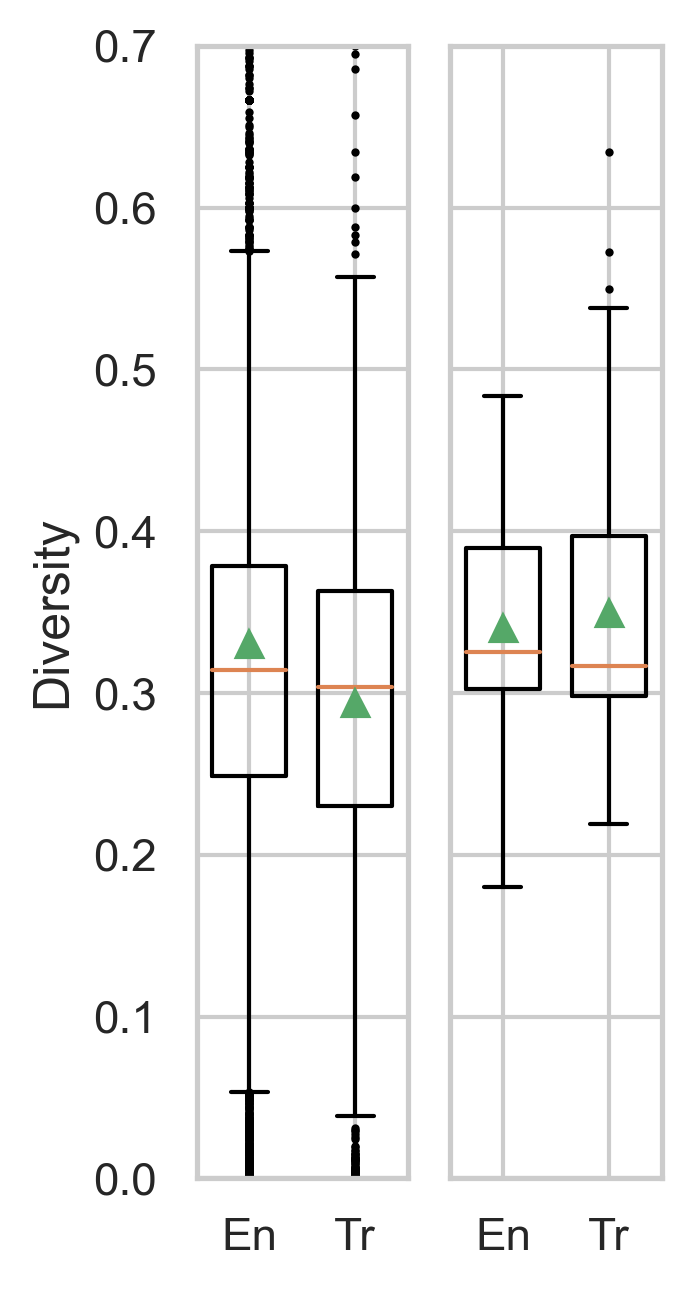

In [68]:
sns.set_style("whitegrid")
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(2,5),sharey=True)
fig.set_dpi(300)
flierprops = dict(marker='o', markerfacecolor='black', markersize=2,markeredgecolor='none')
ax[0].boxplot([divesEn,divesTr],flierprops=flierprops,labels=['En','Tr'],
widths=0.7, showmeans=True )
ax[0].set_ylabel("Diversity")
ax[1].boxplot([X_en[~np.isnan(X_en)],X_tr[~np.isnan(X_tr)]],flierprops=flierprops,labels=['En','Tr'],
widths=0.7, showmeans=True, )




#plt.ylabel('Diversity')
plt.ylim([0,0.7])
plt.show()